# Компʼютерний практикум №6
Виконав студент групи ЗК-41мп Гломозда Костянтин

НЕЙРОННА МЕРЕЖА ДЛЯ ЗАДАЧІ РЕГРЕСІЇ

In [103]:
! pip install matplotlib --quiet

## Завдання 1

1) Підготовка даних

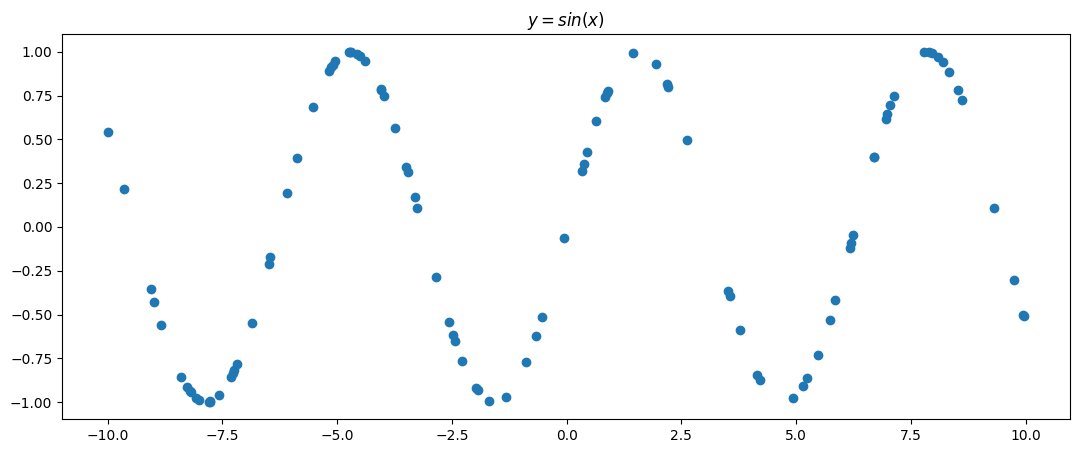

In [104]:
import torch
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')
plt.show()

2. Створємо шум

(100,)


Text(0.5, 1.0, 'Gaussian noise')

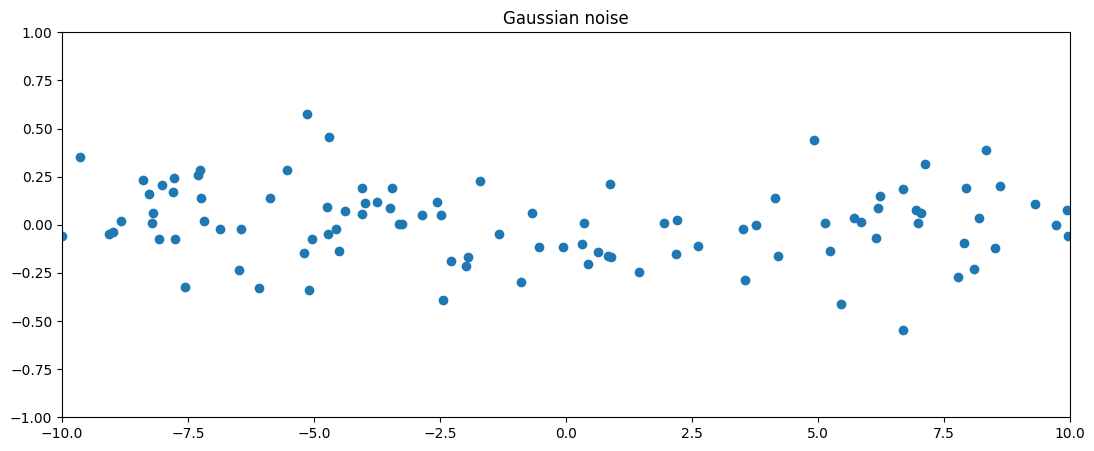

In [105]:
noise = torch.randn(y_train.shape) / 5.
print(x_train.numpy().shape)

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

3. Додаємо шум

Text(0, 0.5, 'y_train')

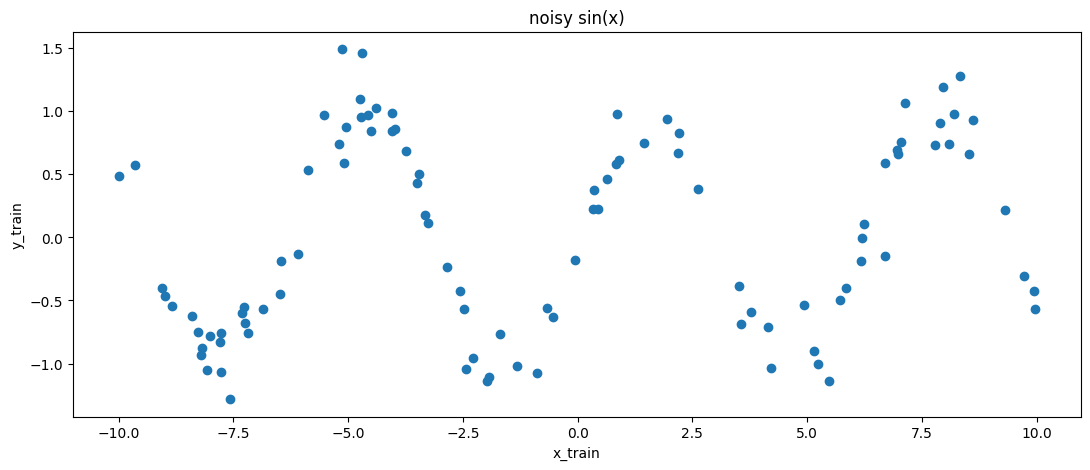

In [106]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

4. Узагальнюємо розмірності

In [107]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

print(x_train.shape)
print(y_train.shape)

torch.Size([100, 1])
torch.Size([100, 1])


5. Створємо валідаційну вибірку

Text(0, 0.5, 'y_validation')

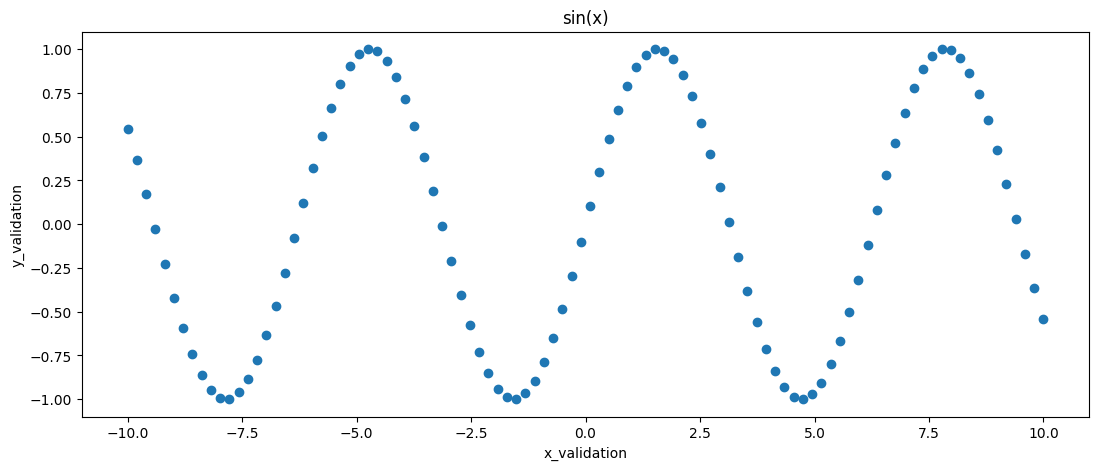

In [108]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

6. Узагальнюємо розмірності

In [109]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

7. Створимо функцію передбачення

In [110]:
def predict(net, x, y):
    y_pred = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

8. Створюємо одразу 10 мереж з різною кількістю нейронів та функцією активації tanh

SineNet(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=1, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)
...
SineNet(
  (fc1): Linear(in_features=1, out_features=9, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=9, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


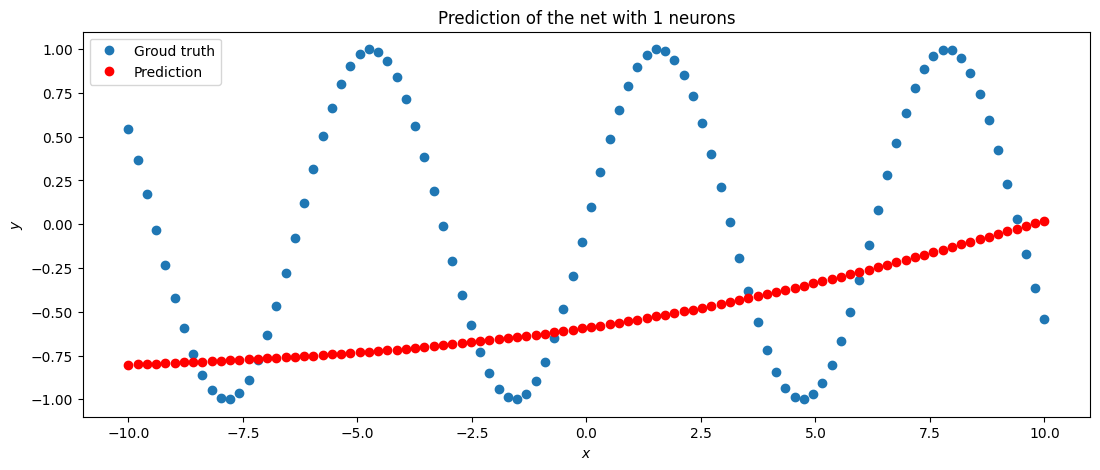

In [111]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, activate=torch.nn.Tanh()):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        # Функція активації
        self.act1 = activate
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

nets_tanh_1_hidden = [SineNet(n_neurons) for n_neurons in range(1, 11)]
print(*nets_tanh_1_hidden[:2], sep='\n\n')
print('...')
print(*nets_tanh_1_hidden[-2:], sep='\n\n')

predict(nets_tanh_1_hidden[0], x_validation, y_validation)
plt.title(f'Prediction of the net with {nets_tanh_1_hidden[0].fc1.out_features} neurons')
plt.show()

9. Навчаємо мережі

In [112]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [113]:
def train(net, x_train, y_train, epochs):
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    loss_values = []
    for i in range(epochs):
        optimizer.zero_grad()
        y_pred = net.forward(x_train)
        loss_val = loss(y_pred, y_train)
        loss_val.backward()
        optimizer.step()
        loss_values.append(loss_val.item())
        if (i+1) % (epochs / 10) == 0:
            print(f'Epoch {i+1}, Loss {loss_val.item()}')

    plt.plot(range(epochs), loss_values)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Залежність втрат від кількості епох')
    plt.show()
    
    predict(net, x_validation, y_validation)

Можемо помітити, що зі збільшенням нейронів покращується результат навчання мережі

Neurons: 1
Epoch 100, Loss 0.5552667379379272
Epoch 200, Loss 0.5550267696380615
Epoch 300, Loss 0.5547623634338379
Epoch 400, Loss 0.5544933080673218


Epoch 500, Loss 0.5542415380477905
Epoch 600, Loss 0.5540173053741455
Epoch 700, Loss 0.553822934627533
Epoch 800, Loss 0.5536558032035828
Epoch 900, Loss 0.5535117983818054
Epoch 1000, Loss 0.5533868074417114


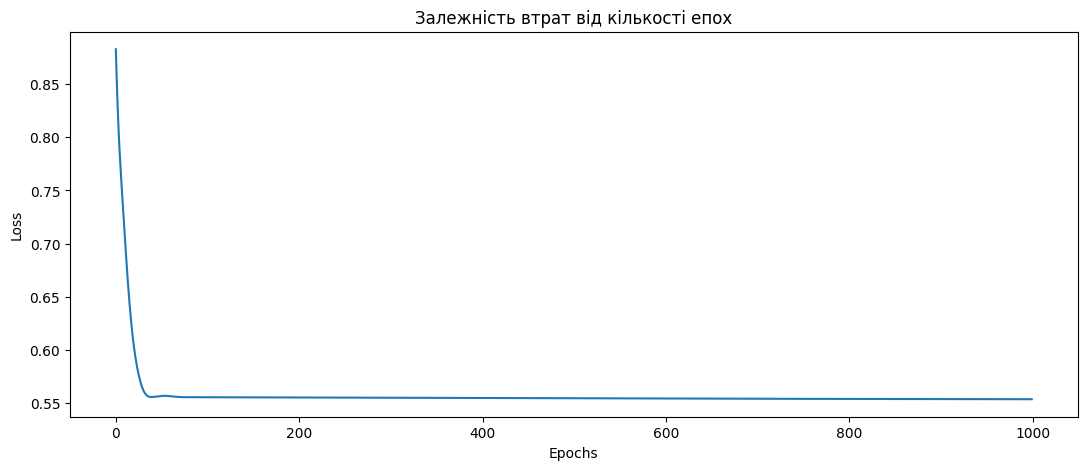

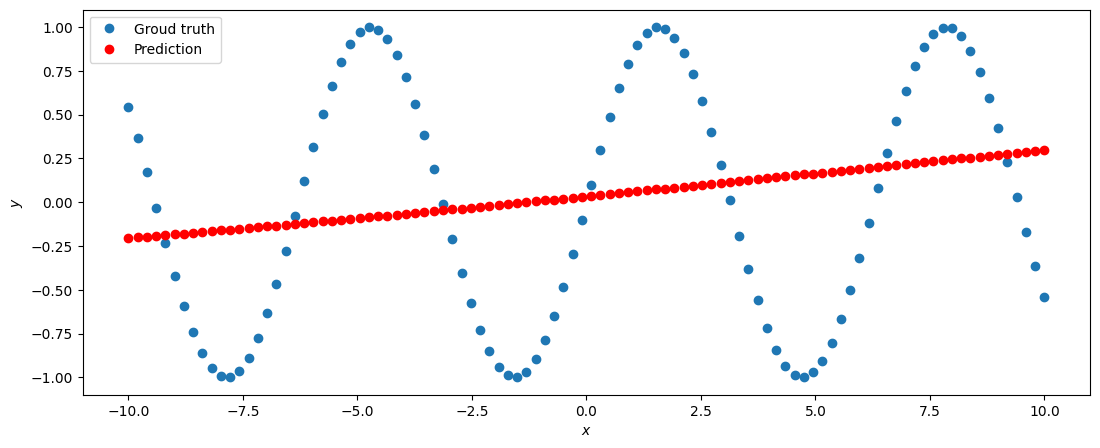

Neurons: 2
Epoch 100, Loss 0.5599594712257385
Epoch 200, Loss 0.5495488047599792
Epoch 300, Loss 0.5255470275878906
Epoch 400, Loss 0.49919813871383667
Epoch 500, Loss 0.4825812578201294
Epoch 600, Loss 0.47396522760391235
Epoch 700, Loss 0.46984586119651794
Epoch 800, Loss 0.46787911653518677
Epoch 900, Loss 0.46689265966415405
Epoch 1000, Loss 0.46633633971214294


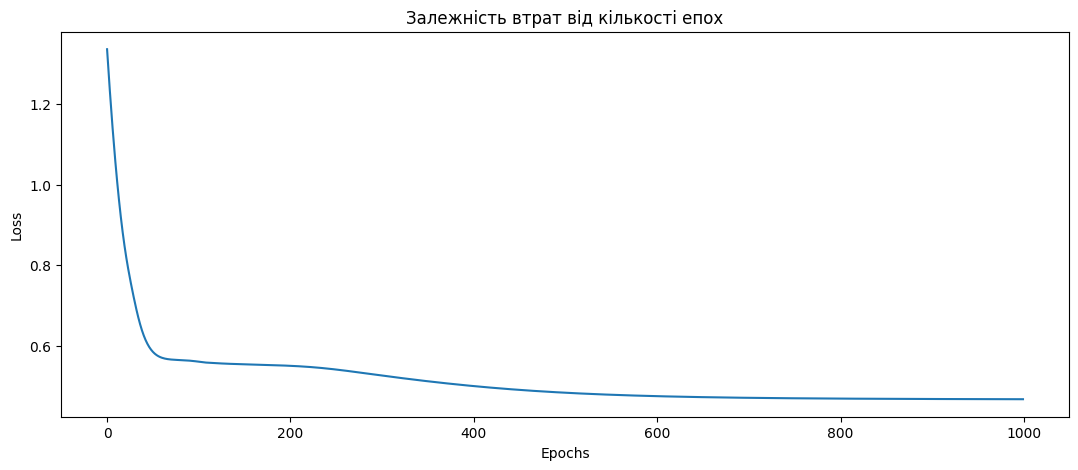

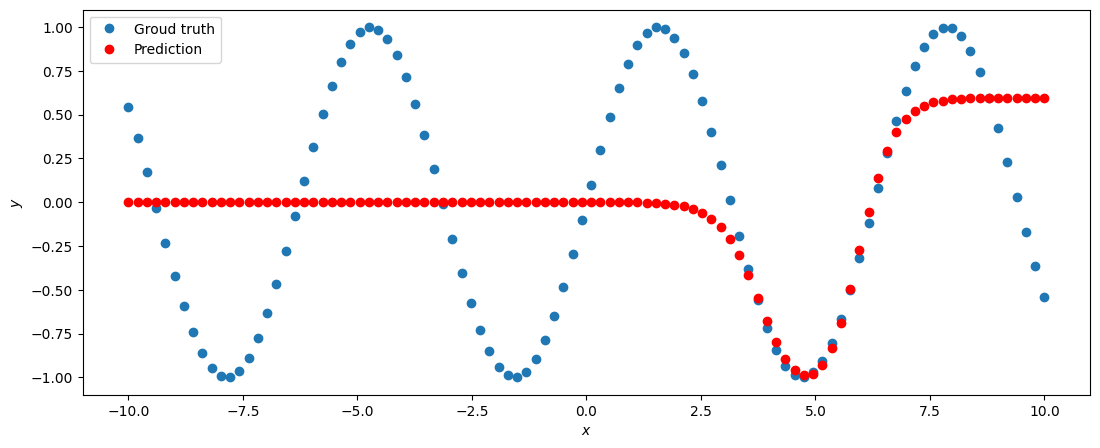

Neurons: 3
Epoch 100, Loss 0.48912543058395386
Epoch 200, Loss 0.4619521200656891
Epoch 300, Loss 0.45388153195381165
Epoch 400, Loss 0.36618736386299133
Epoch 500, Loss 0.24569840729236603
Epoch 600, Loss 0.22107453644275665
Epoch 700, Loss 0.21320106089115143
Epoch 800, Loss 0.20840822160243988
Epoch 900, Loss 0.20468169450759888
Epoch 1000, Loss 0.20189407467842102


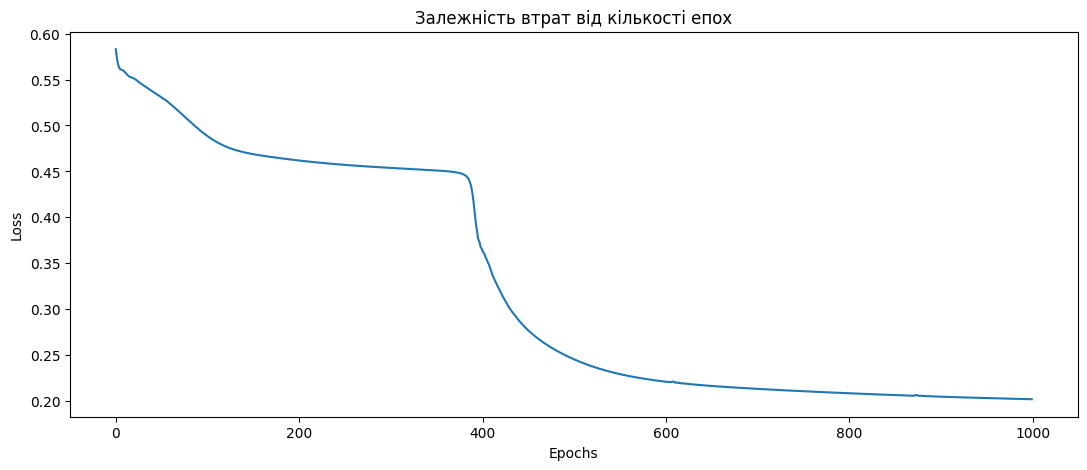

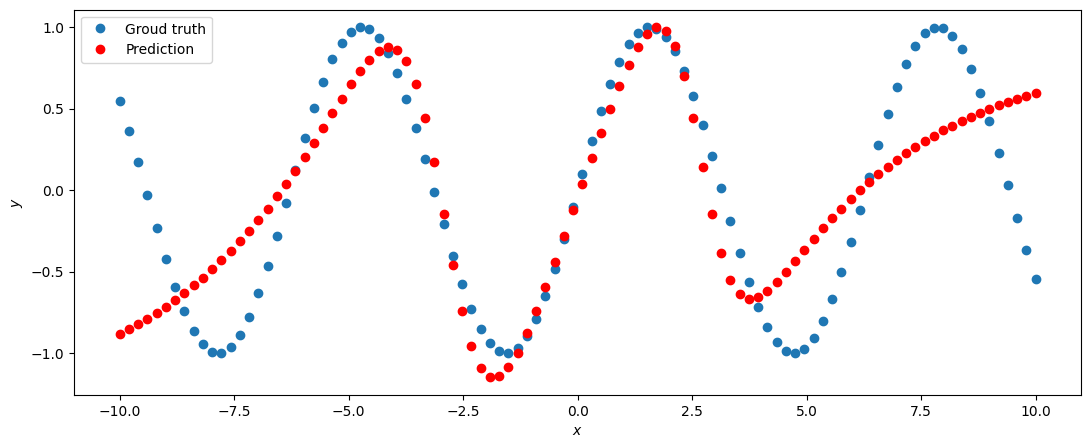

Neurons: 4
Epoch 100, Loss 0.5247953534126282
Epoch 200, Loss 0.44506973028182983
Epoch 300, Loss 0.31601428985595703
Epoch 400, Loss 0.25123330950737
Epoch 500, Loss 0.2395358830690384
Epoch 600, Loss 0.23580223321914673
Epoch 700, Loss 0.2335847020149231
Epoch 800, Loss 0.23189300298690796
Epoch 900, Loss 0.2305326908826828
Epoch 1000, Loss 0.2294309437274933


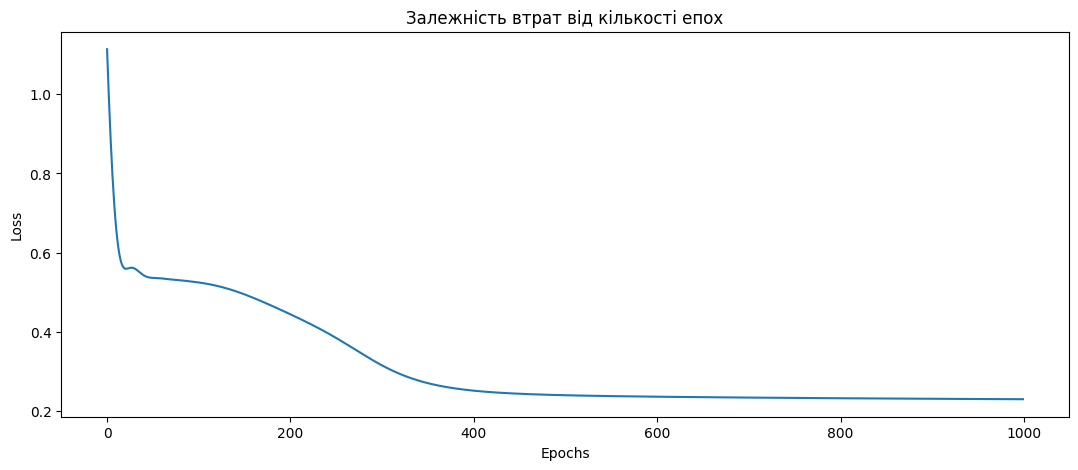

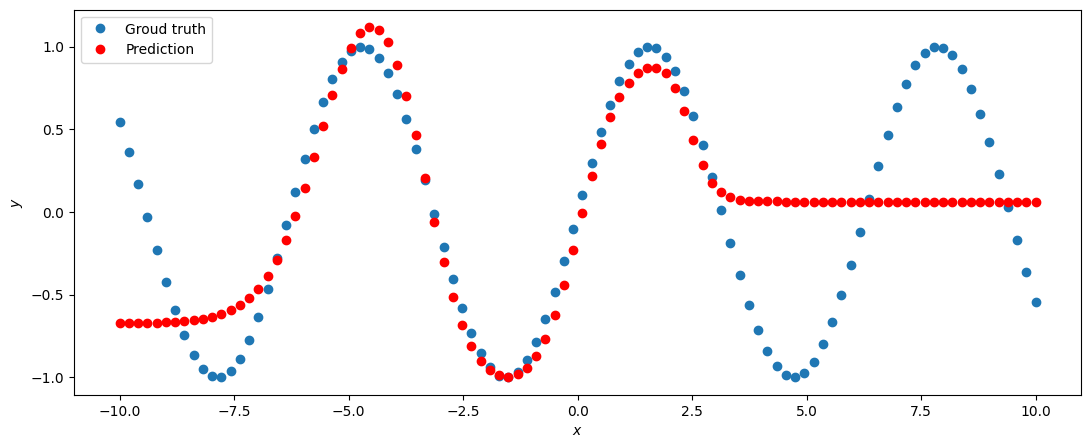

Neurons: 5
Epoch 100, Loss 0.4911085367202759
Epoch 200, Loss 0.30318623781204224
Epoch 300, Loss 0.25073546171188354
Epoch 400, Loss 0.23996353149414062
Epoch 500, Loss 0.23486043512821198
Epoch 600, Loss 0.23154769837856293
Epoch 700, Loss 0.22905364632606506
Epoch 800, Loss 0.22699928283691406
Epoch 900, Loss 0.22512878477573395
Epoch 1000, Loss 0.22303560376167297


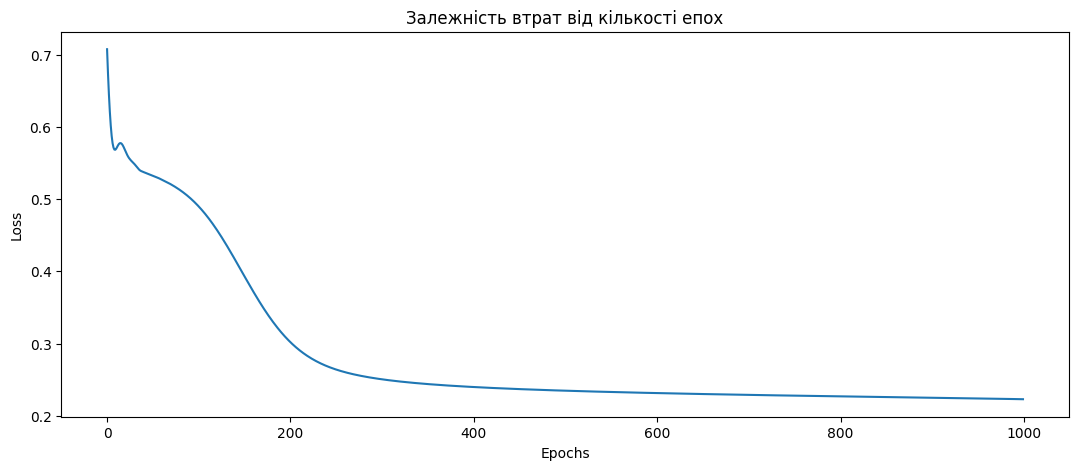

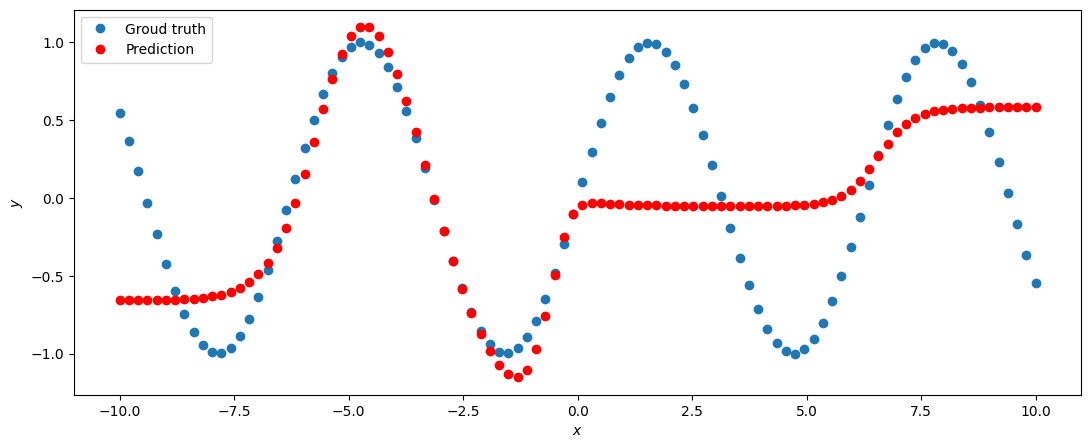

Neurons: 6
Epoch 100, Loss 0.4790920317173004
Epoch 200, Loss 0.3147638738155365
Epoch 300, Loss 0.24598389863967896
Epoch 400, Loss 0.23530760407447815
Epoch 500, Loss 0.23240162432193756
Epoch 600, Loss 0.23086296021938324
Epoch 700, Loss 0.2296767383813858
Epoch 800, Loss 0.22798192501068115
Epoch 900, Loss 0.13874317705631256
Epoch 1000, Loss 0.1244921013712883


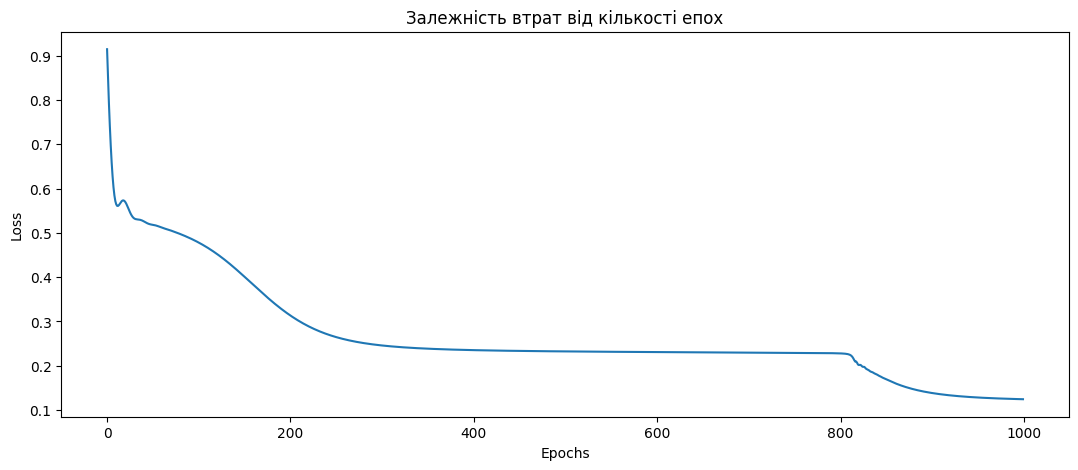

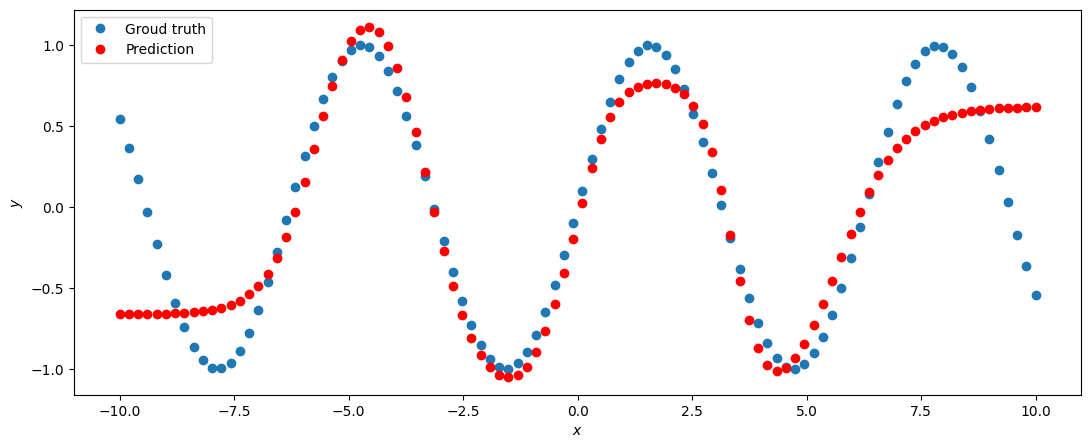

Neurons: 7
Epoch 100, Loss 0.40941256284713745
Epoch 200, Loss 0.25674447417259216
Epoch 300, Loss 0.23583883047103882
Epoch 400, Loss 0.23235486447811127
Epoch 500, Loss 0.2308962196111679
Epoch 600, Loss 0.229840949177742
Epoch 700, Loss 0.22895725071430206
Epoch 800, Loss 0.22813470661640167
Epoch 900, Loss 0.15199731290340424
Epoch 1000, Loss 0.12534497678279877


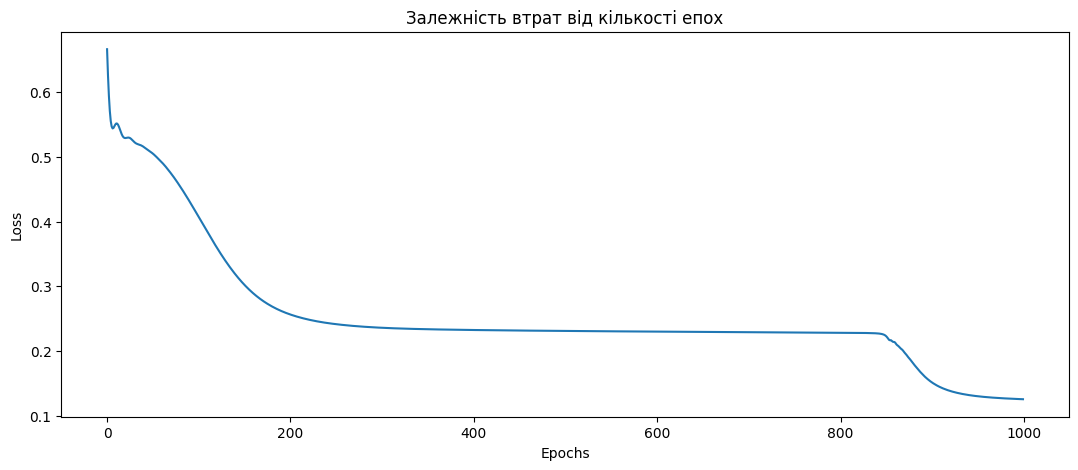

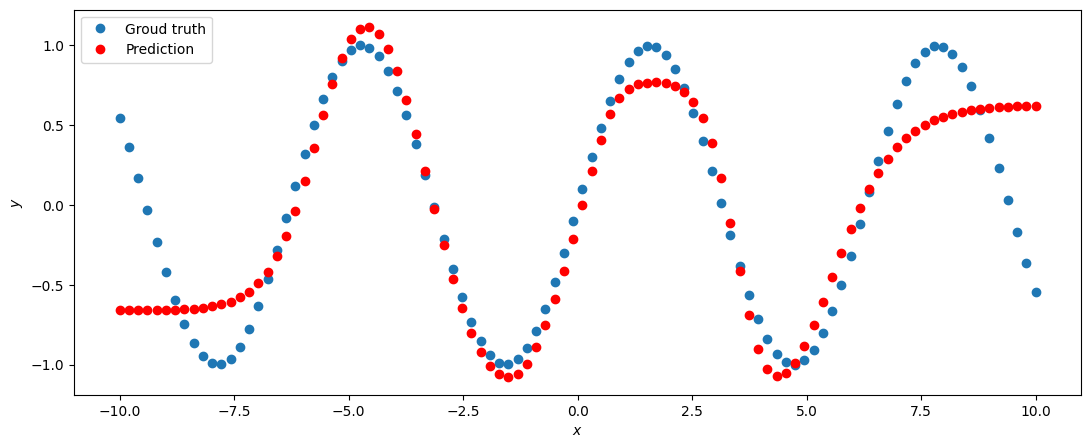

Neurons: 8
Epoch 100, Loss 0.47428321838378906
Epoch 200, Loss 0.3313732445240021
Epoch 300, Loss 0.24653156101703644
Epoch 400, Loss 0.20538879930973053
Epoch 500, Loss 0.16145338118076324
Epoch 600, Loss 0.14274701476097107
Epoch 700, Loss 0.13279354572296143
Epoch 800, Loss 0.12723307311534882
Epoch 900, Loss 0.11467858403921127
Epoch 1000, Loss 0.10466998815536499


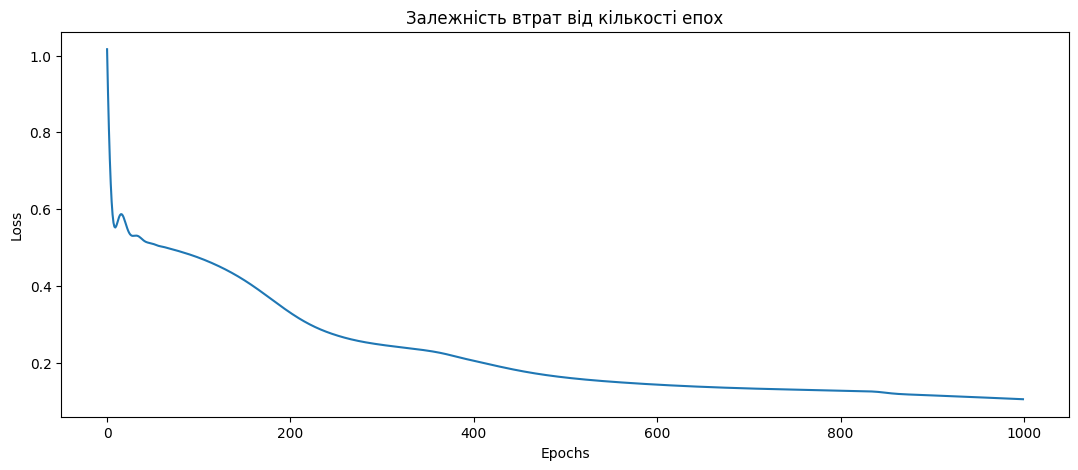

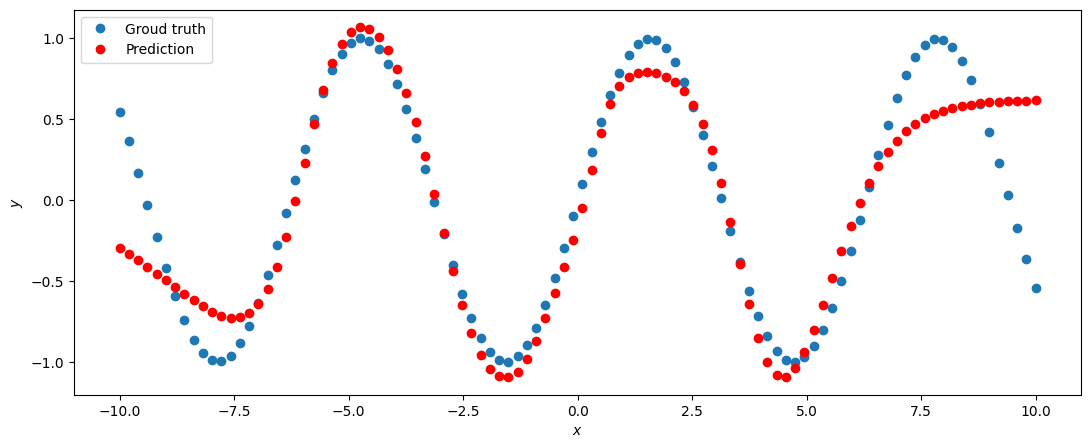

Neurons: 9
Epoch 100, Loss 0.4792536199092865
Epoch 200, Loss 0.37863391637802124
Epoch 300, Loss 0.24960996210575104
Epoch 400, Loss 0.23726946115493774
Epoch 500, Loss 0.23369157314300537
Epoch 600, Loss 0.23157072067260742
Epoch 700, Loss 0.2301051765680313
Epoch 800, Loss 0.18601246178150177
Epoch 900, Loss 0.12696492671966553
Epoch 1000, Loss 0.12145514786243439


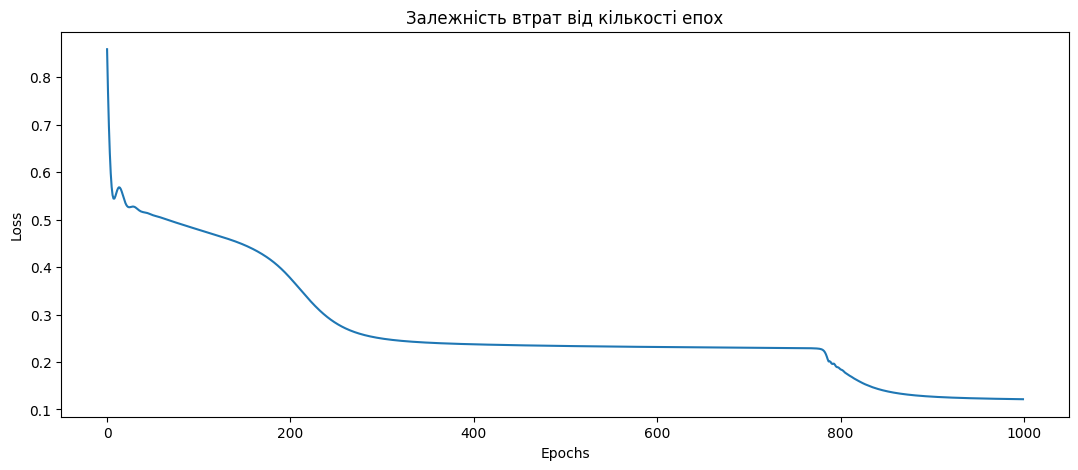

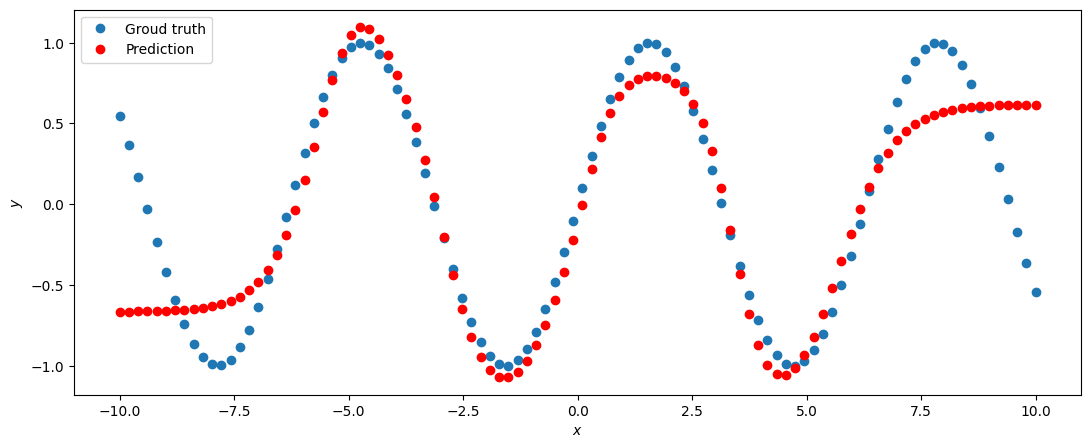

Neurons: 10
Epoch 100, Loss 0.3985055685043335
Epoch 200, Loss 0.22968198359012604
Epoch 300, Loss 0.14941729605197906
Epoch 400, Loss 0.12958449125289917
Epoch 500, Loss 0.11316411197185516
Epoch 600, Loss 0.08724159002304077
Epoch 700, Loss 0.07511327415704727
Epoch 800, Loss 0.07184679806232452
Epoch 900, Loss 0.07052011787891388
Epoch 1000, Loss 0.06955878436565399


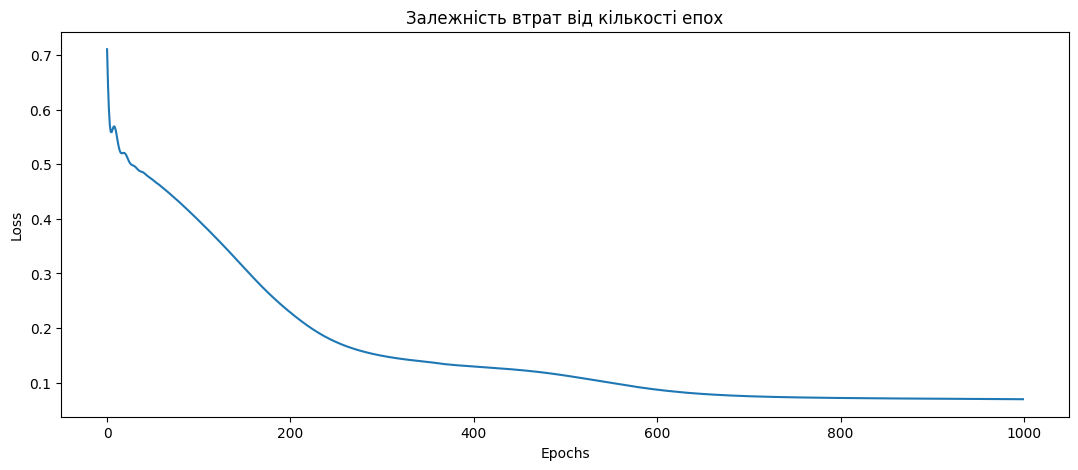

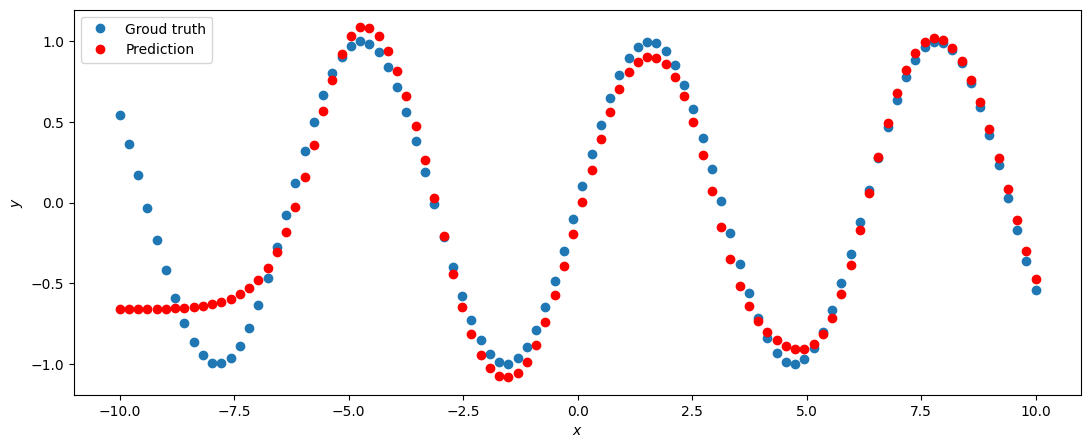

In [114]:
for net in nets_tanh_1_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 1000)
    plt.show()

Збільшимо кількість епох навчання. Можемо помітити, що на 8 нейронів результат вийшов найкращим, але взагалом це не дало великий вплив

Neurons: 1
Epoch 200, Loss 0.5468069314956665
Epoch 400, Loss 0.49424904584884644
Epoch 600, Loss 0.48193344473838806
Epoch 800, Loss 0.4770566523075104
Epoch 1000, Loss 0.47445186972618103
Epoch 1200, Loss 0.47284001111984253
Epoch 1400, Loss 0.4717499613761902
Epoch 1600, Loss 0.47096705436706543
Epoch 1800, Loss 0.47037985920906067
Epoch 2000, Loss 0.46992477774620056


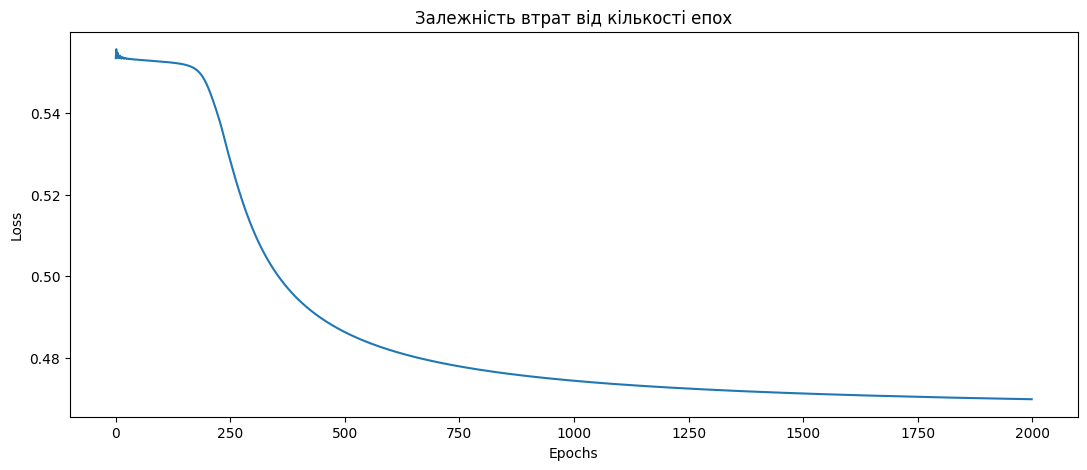

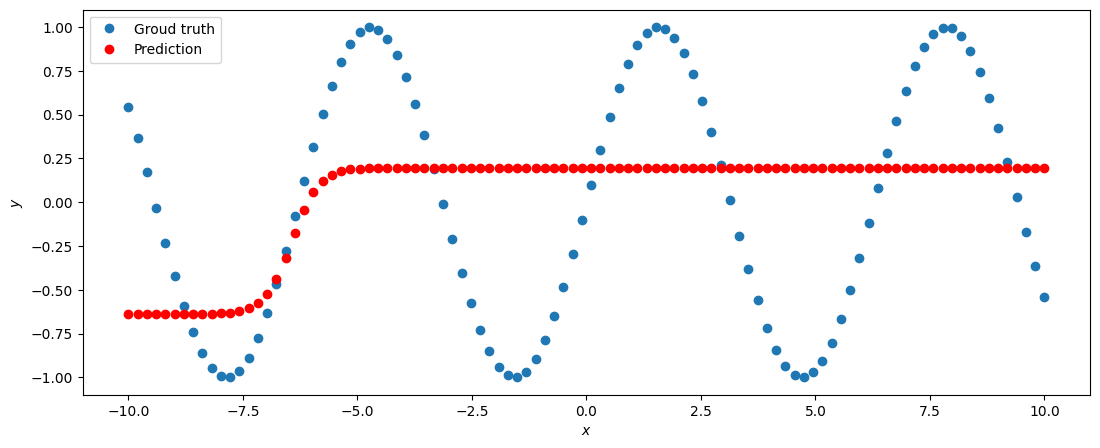

Neurons: 2
Epoch 200, Loss 0.464049756526947
Epoch 400, Loss 0.4631595313549042
Epoch 600, Loss 0.4628002643585205
Epoch 800, Loss 0.46264228224754333
Epoch 1000, Loss 0.462568998336792
Epoch 1200, Loss 0.4625323414802551
Epoch 1400, Loss 0.4625139534473419
Epoch 1600, Loss 0.4625042676925659
Epoch 1800, Loss 0.46249908208847046
Epoch 2000, Loss 0.4624960720539093


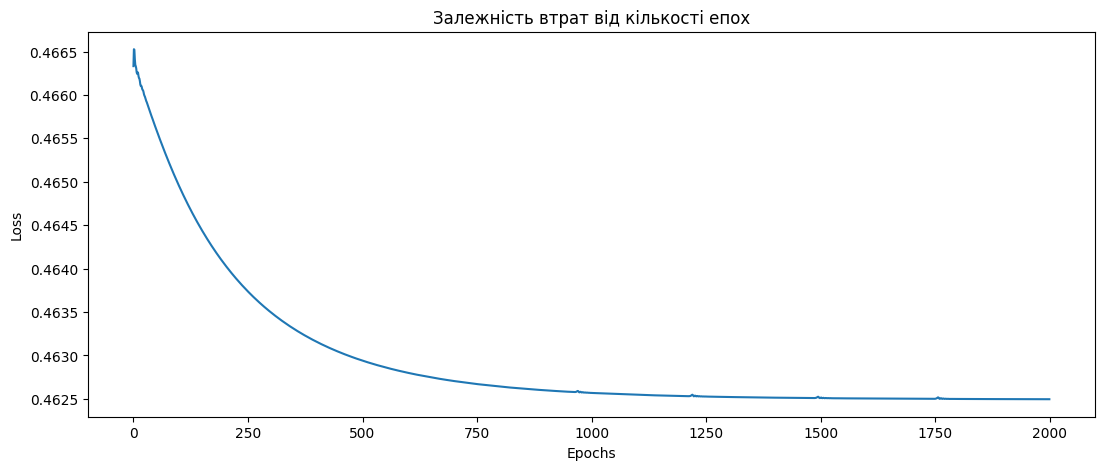

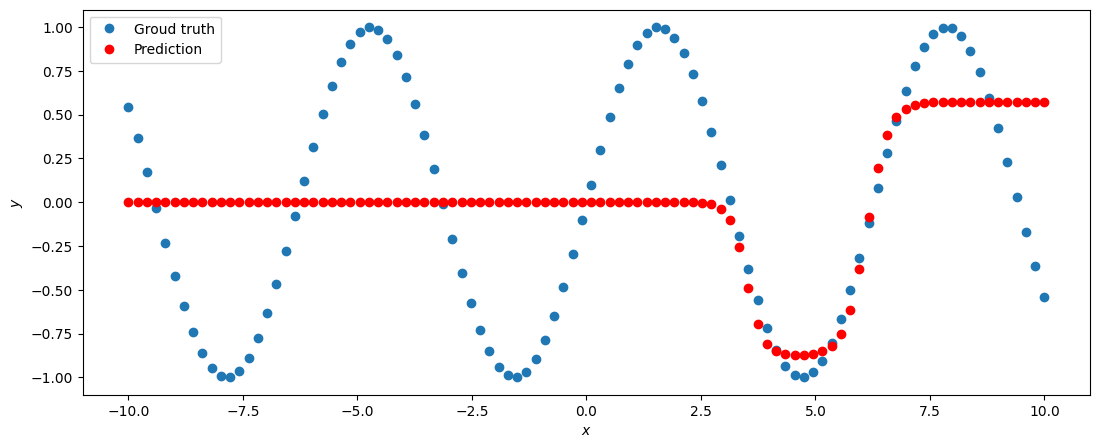

Neurons: 3
Epoch 200, Loss 0.19938963651657104
Epoch 400, Loss 0.19711780548095703
Epoch 600, Loss 0.19572940468788147
Epoch 800, Loss 0.19495707750320435
Epoch 1000, Loss 0.19454644620418549
Epoch 1200, Loss 0.19444531202316284
Epoch 1400, Loss 0.19417308270931244
Epoch 1600, Loss 0.19409595429897308
Epoch 1800, Loss 0.19404804706573486
Epoch 2000, Loss 0.19404377043247223


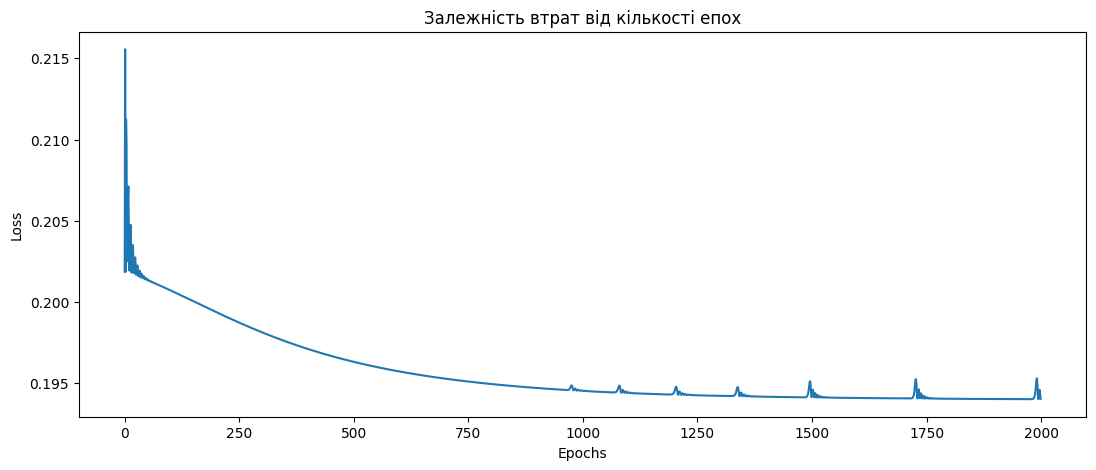

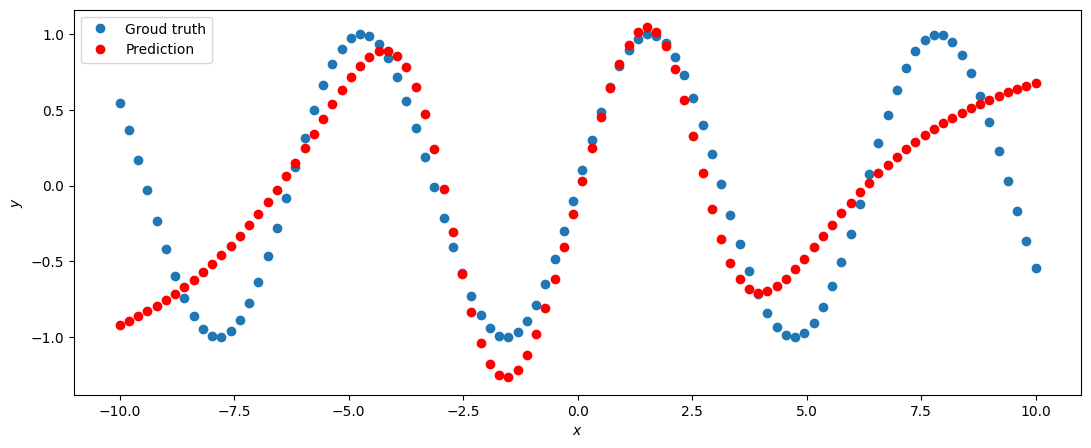

Neurons: 4
Epoch 200, Loss 0.1626472920179367
Epoch 400, Loss 0.14507371187210083
Epoch 600, Loss 0.14032955467700958
Epoch 800, Loss 0.13820680975914001
Epoch 1000, Loss 0.13699111342430115
Epoch 1200, Loss 0.13618692755699158
Epoch 1400, Loss 0.13562235236167908
Epoch 1600, Loss 0.13520433008670807
Epoch 1800, Loss 0.13488426804542542
Epoch 2000, Loss 0.13463175296783447


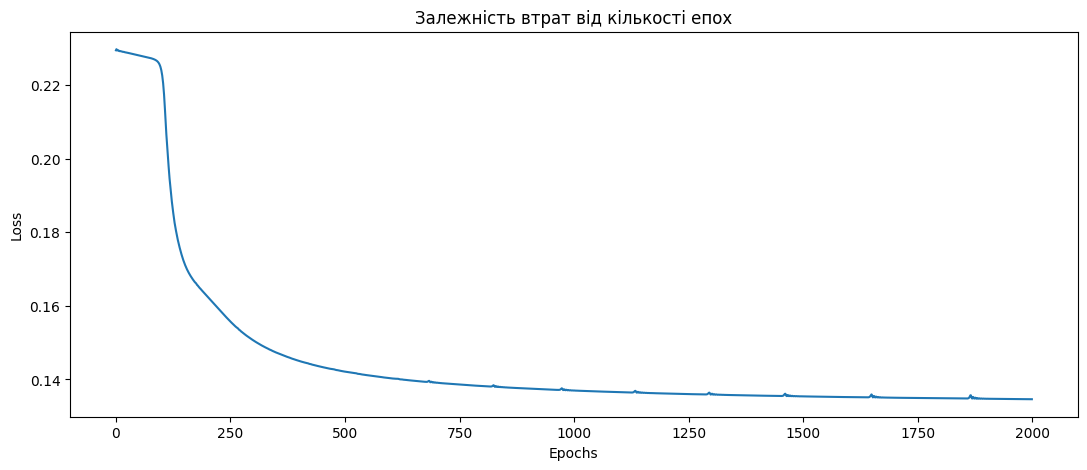

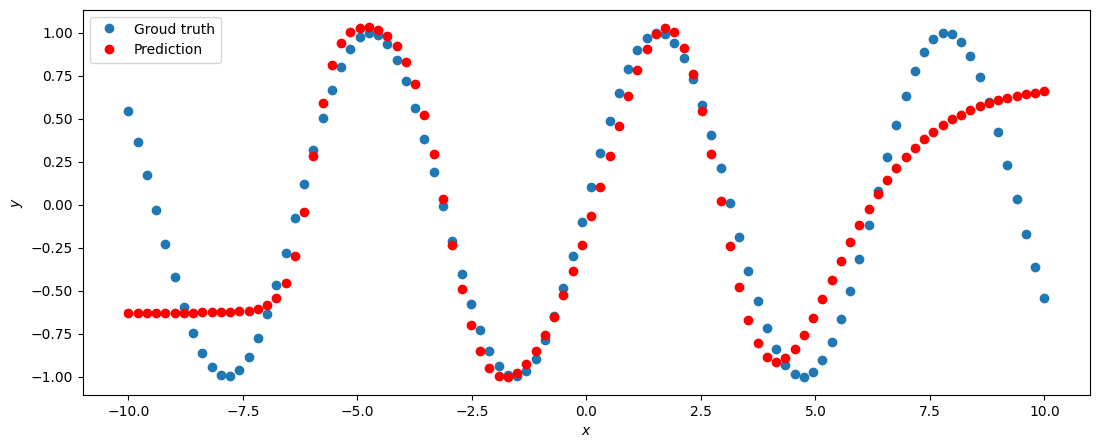

Neurons: 5
Epoch 200, Loss 0.1520892232656479
Epoch 400, Loss 0.09173136949539185
Epoch 600, Loss 0.08033817261457443
Epoch 800, Loss 0.07341313362121582
Epoch 1000, Loss 0.0681547224521637
Epoch 1200, Loss 0.06439224630594254
Epoch 1400, Loss 0.06095818057656288
Epoch 1600, Loss 0.05841277912259102
Epoch 1800, Loss 0.056371331214904785
Epoch 2000, Loss 0.054688408970832825


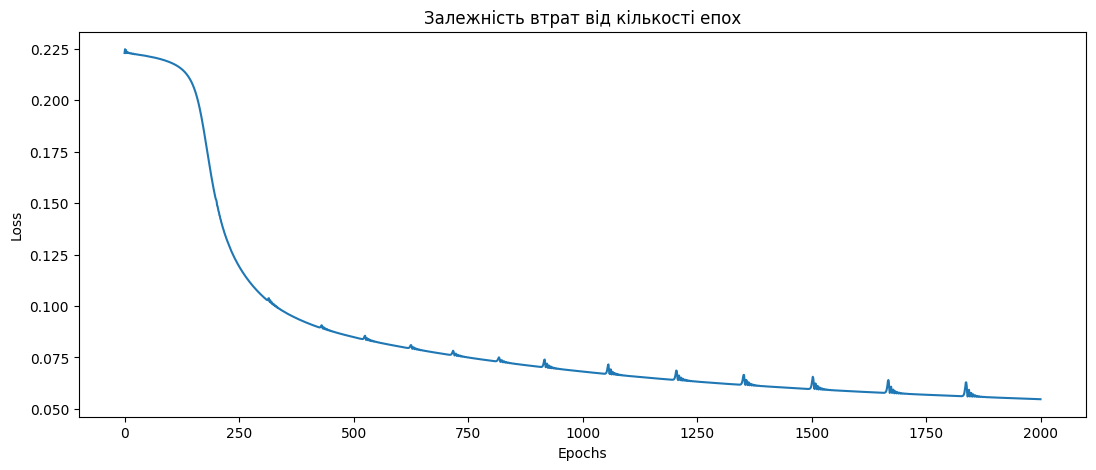

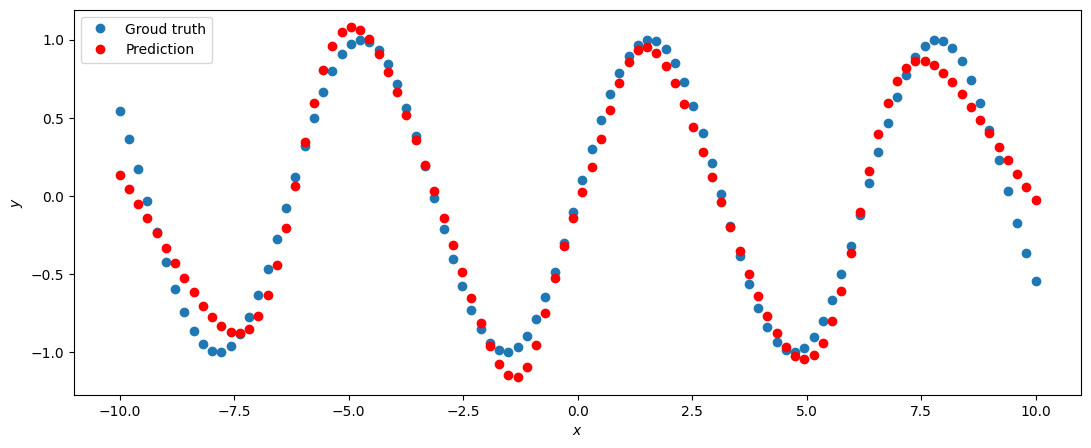

Neurons: 6
Epoch 200, Loss 0.11803750693798065
Epoch 400, Loss 0.11403197050094604
Epoch 600, Loss 0.11196452379226685
Epoch 800, Loss 0.11084027588367462
Epoch 1000, Loss 0.11016382277011871
Epoch 1200, Loss 0.10970701277256012
Epoch 1400, Loss 0.10939081013202667
Epoch 1600, Loss 0.10918239504098892
Epoch 1800, Loss 0.1090427115559578
Epoch 2000, Loss 0.1089465320110321


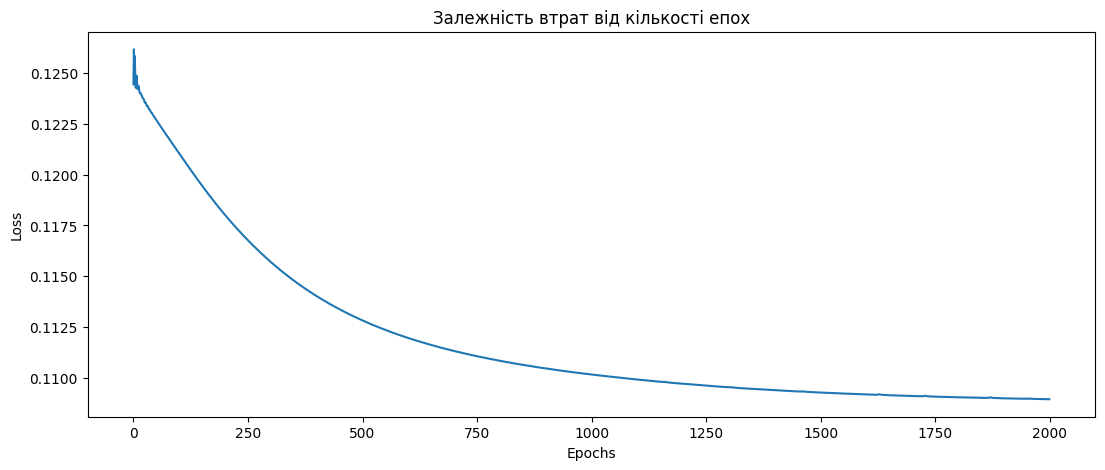

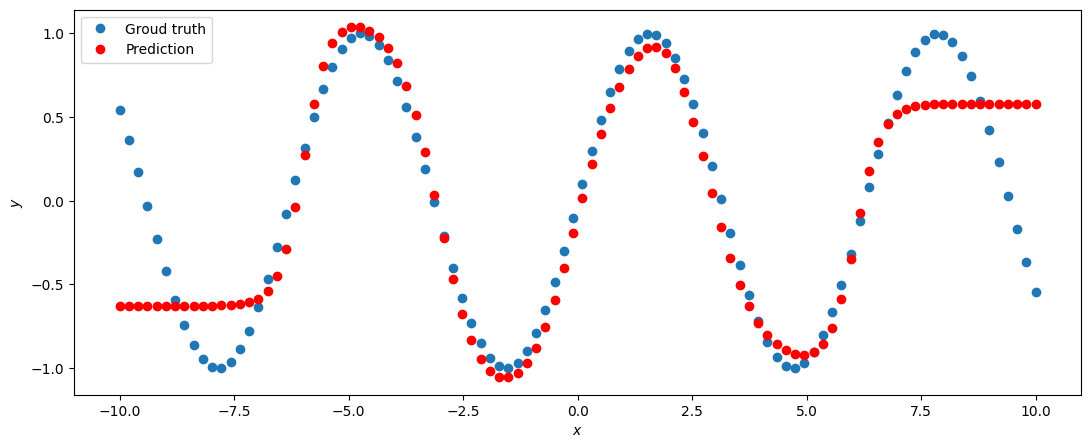

Neurons: 7
Epoch 200, Loss 0.1191372498869896
Epoch 400, Loss 0.11496258527040482
Epoch 600, Loss 0.11276252567768097
Epoch 800, Loss 0.11129293590784073
Epoch 1000, Loss 0.10997100174427032
Epoch 1200, Loss 0.1089644655585289
Epoch 1400, Loss 0.10840610414743423
Epoch 1600, Loss 0.10808733850717545
Epoch 1800, Loss 0.10787823051214218
Epoch 2000, Loss 0.10774805396795273


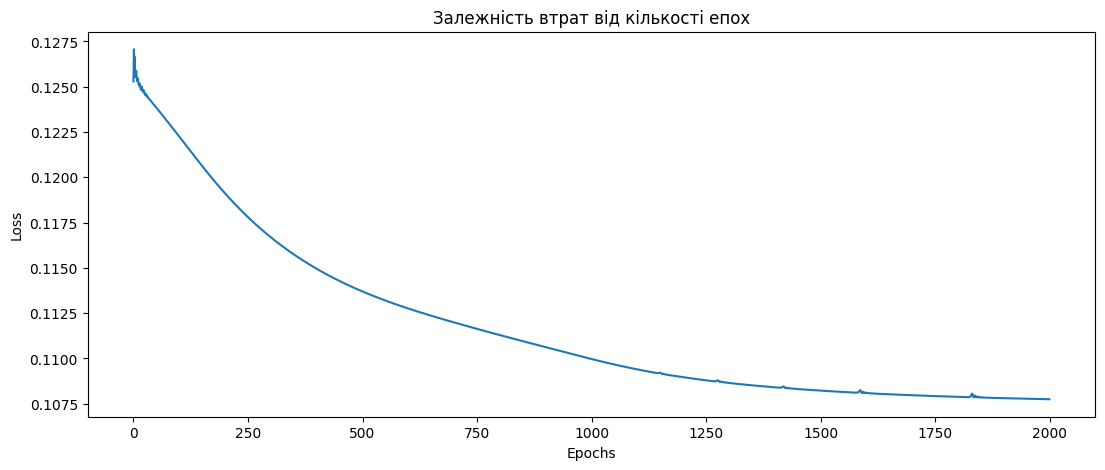

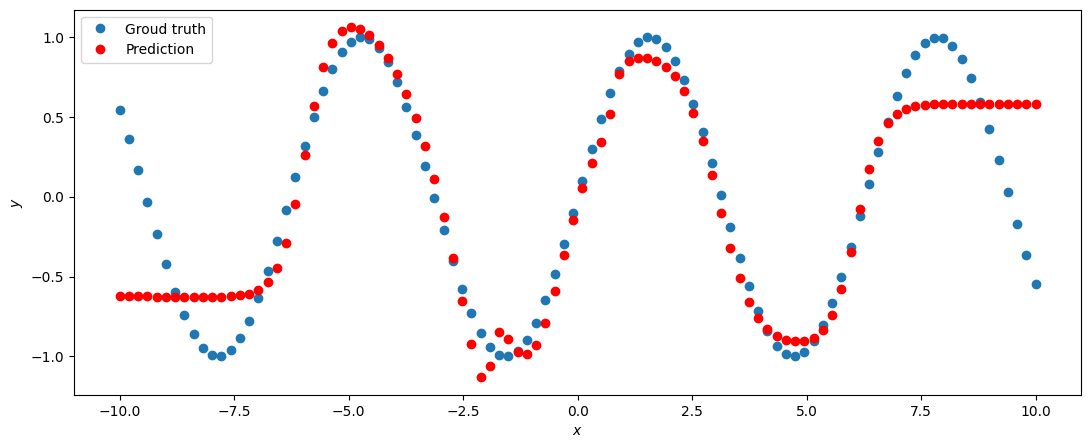

Neurons: 8
Epoch 200, Loss 0.0889493003487587
Epoch 400, Loss 0.0832957923412323
Epoch 600, Loss 0.058575939387083054
Epoch 800, Loss 0.045888930559158325
Epoch 1000, Loss 0.04256515949964523
Epoch 1200, Loss 0.04052900895476341
Epoch 1400, Loss 0.03958307206630707
Epoch 1600, Loss 0.038415469229221344
Epoch 1800, Loss 0.03747396916151047
Epoch 2000, Loss 0.03694984316825867


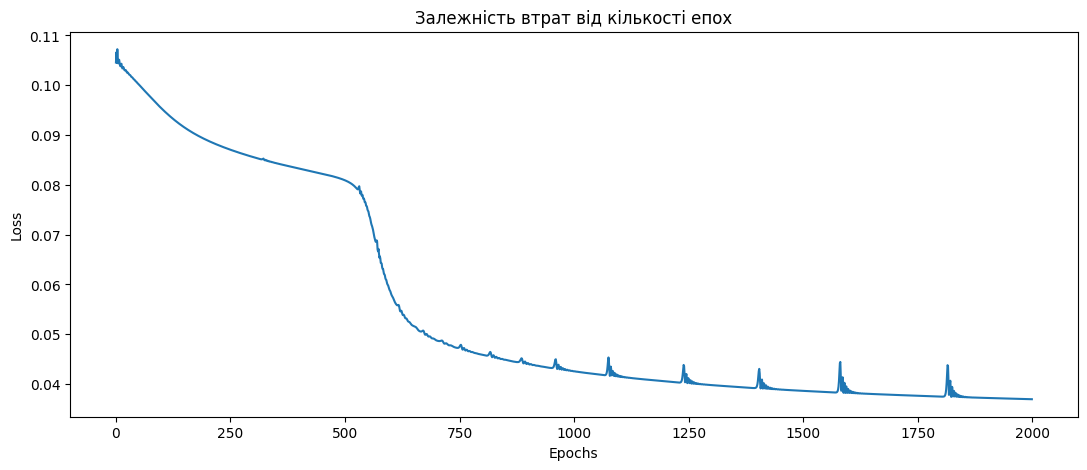

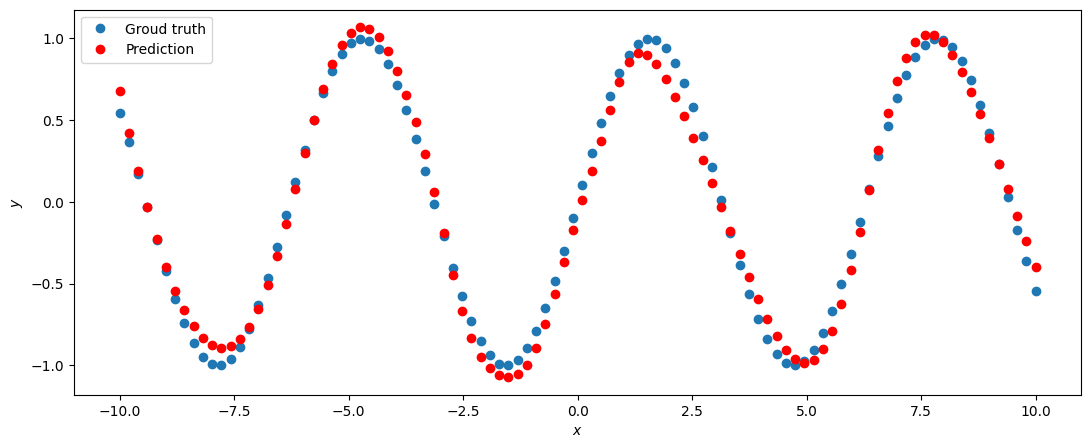

Neurons: 9
Epoch 200, Loss 0.11730995029211044
Epoch 400, Loss 0.08077868819236755
Epoch 600, Loss 0.07854490727186203
Epoch 800, Loss 0.07765675336122513
Epoch 1000, Loss 0.07720358669757843
Epoch 1200, Loss 0.07687435299158096
Epoch 1400, Loss 0.07665512710809708
Epoch 1600, Loss 0.07649645954370499
Epoch 1800, Loss 0.0763654038310051
Epoch 2000, Loss 0.07625829428434372


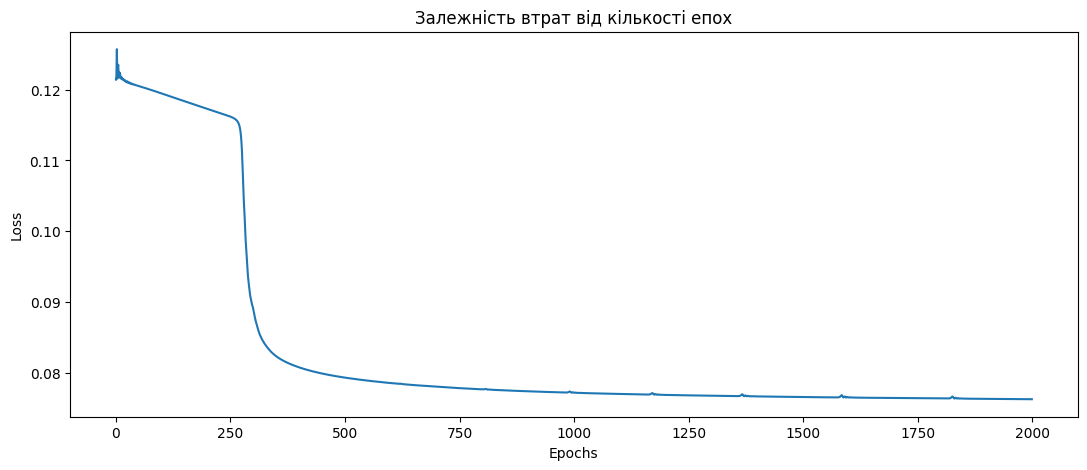

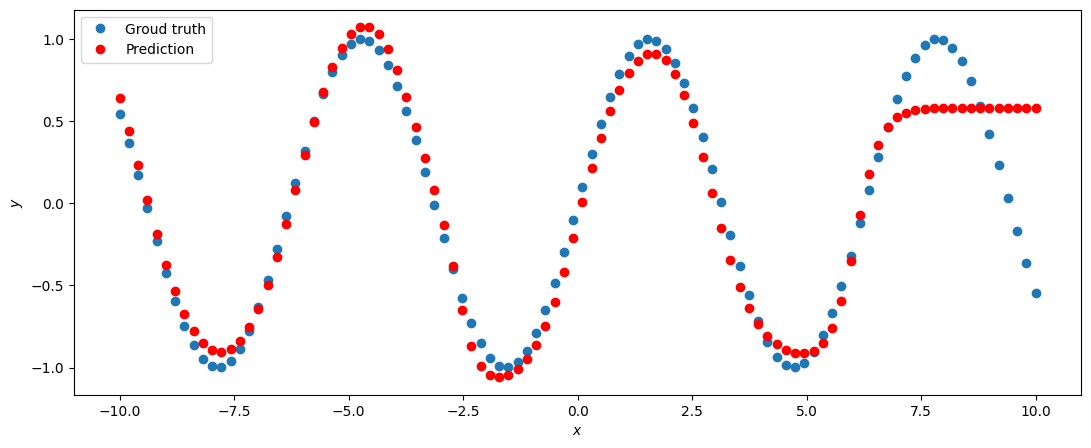

Neurons: 10
Epoch 200, Loss 0.03701959177851677
Epoch 400, Loss 0.03360117971897125
Epoch 600, Loss 0.03311300650238991
Epoch 800, Loss 0.032933518290519714
Epoch 1000, Loss 0.032859448343515396
Epoch 1200, Loss 0.0328180156648159
Epoch 1400, Loss 0.032784927636384964
Epoch 1600, Loss 0.032751794904470444
Epoch 1800, Loss 0.03271506726741791
Epoch 2000, Loss 0.03267162665724754


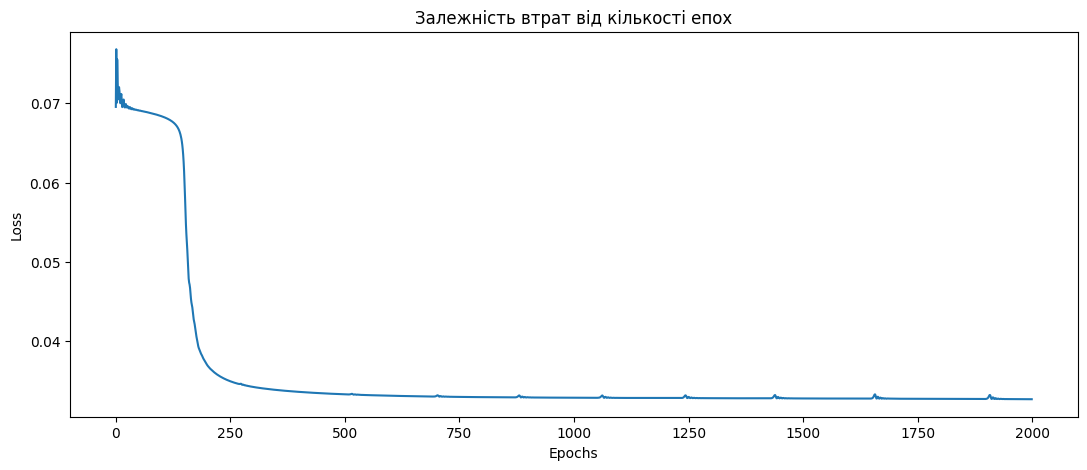

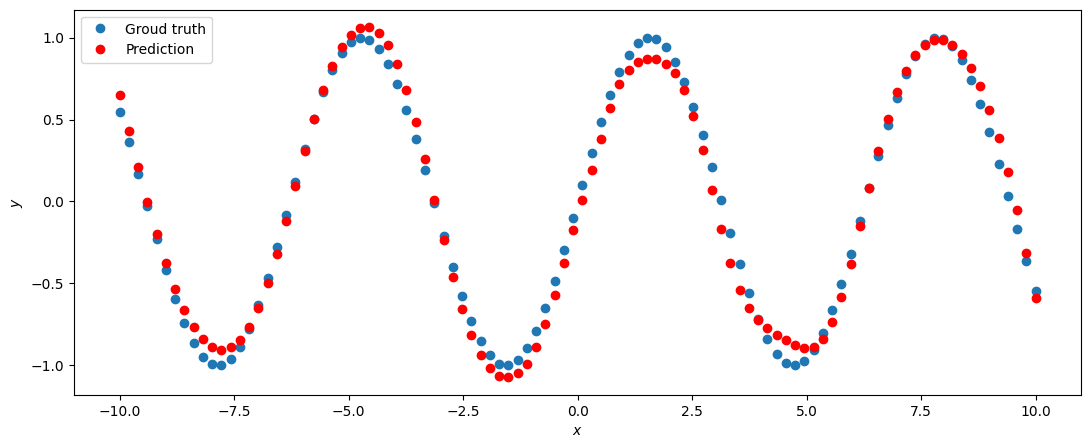

In [115]:
for net in nets_tanh_1_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 2000)
    plt.show()

Зменшимо кількість епох (будемо використовувати тільки мережі з 7-10 нейронами)

Результат не покращився

Neurons: 7
Epoch 50, Loss 0.10773727297782898
Epoch 100, Loss 0.10771778225898743
Epoch 150, Loss 0.1077016294002533
Epoch 200, Loss 0.10768444836139679
Epoch 250, Loss 0.10766716301441193
Epoch 300, Loss 0.10765033960342407
Epoch 350, Loss 0.10763440281152725
Epoch 400, Loss 0.1076195240020752
Epoch 450, Loss 0.10760582238435745
Epoch 500, Loss 0.10759332031011581


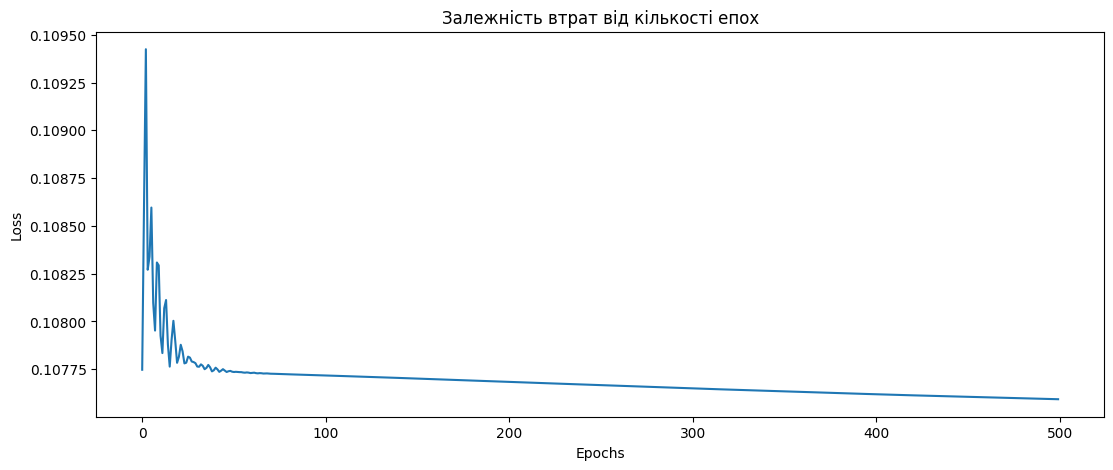

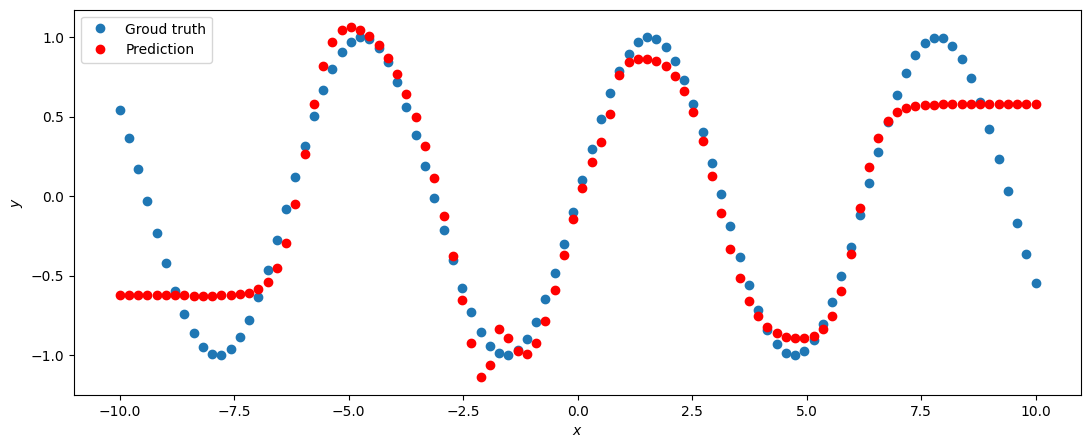

Neurons: 8
Epoch 50, Loss 0.03747831657528877
Epoch 100, Loss 0.036896396428346634
Epoch 150, Loss 0.036870814859867096
Epoch 200, Loss 0.03684256598353386
Epoch 250, Loss 0.03681064397096634
Epoch 300, Loss 0.036775603890419006
Epoch 350, Loss 0.03673774003982544
Epoch 400, Loss 0.036697324365377426
Epoch 450, Loss 0.036654673516750336
Epoch 500, Loss 0.03660999983549118


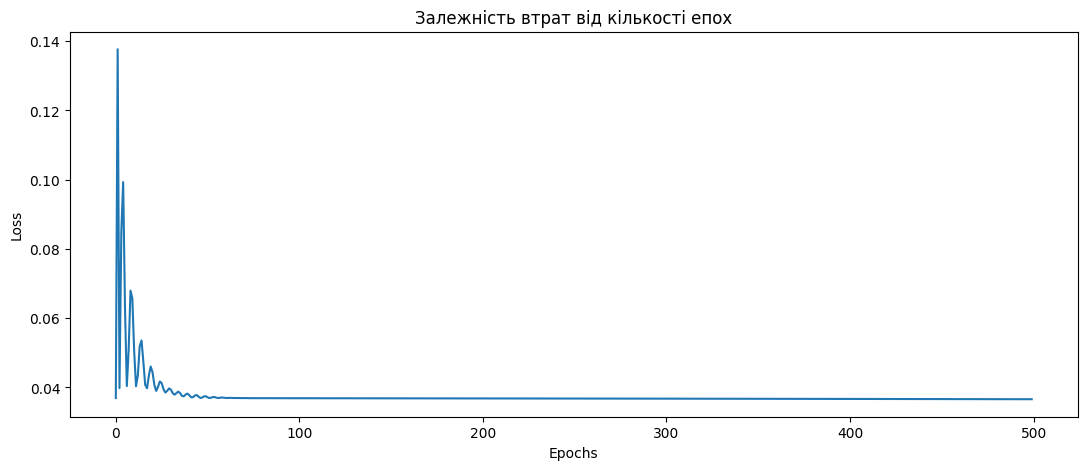

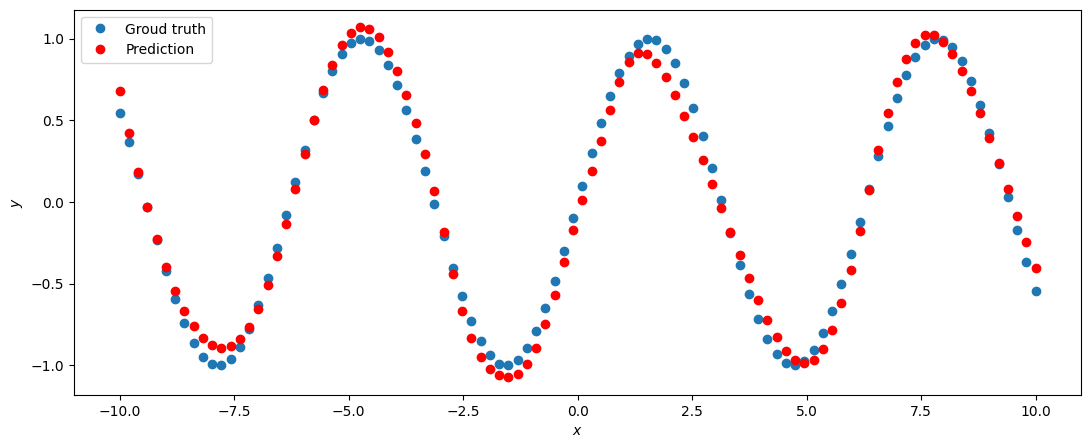

Neurons: 9
Epoch 50, Loss 0.0762484073638916
Epoch 100, Loss 0.07623181492090225
Epoch 150, Loss 0.07621948421001434
Epoch 200, Loss 0.07620585709810257
Epoch 250, Loss 0.076191246509552
Epoch 300, Loss 0.0761759802699089
Epoch 350, Loss 0.07616032660007477
Epoch 400, Loss 0.07614438980817795
Epoch 450, Loss 0.0761282816529274
Epoch 500, Loss 0.0761120542883873


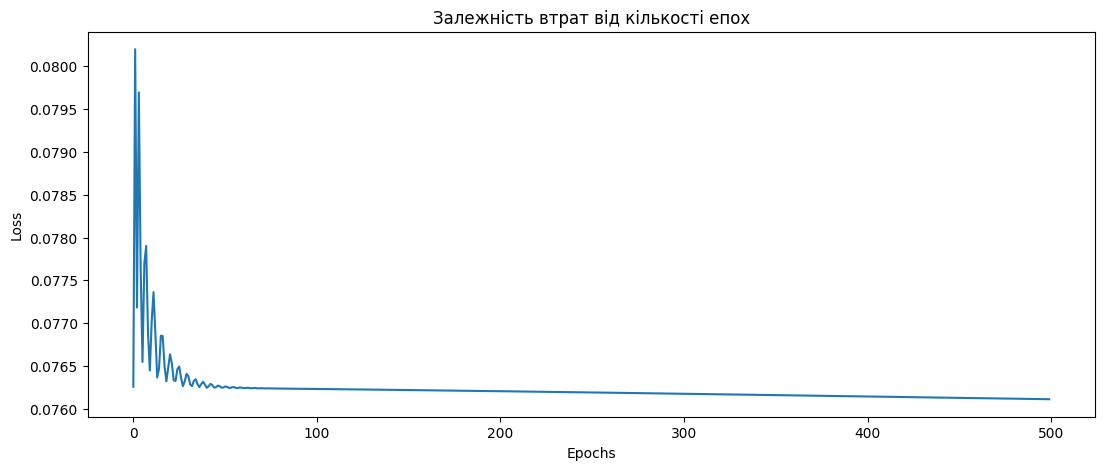

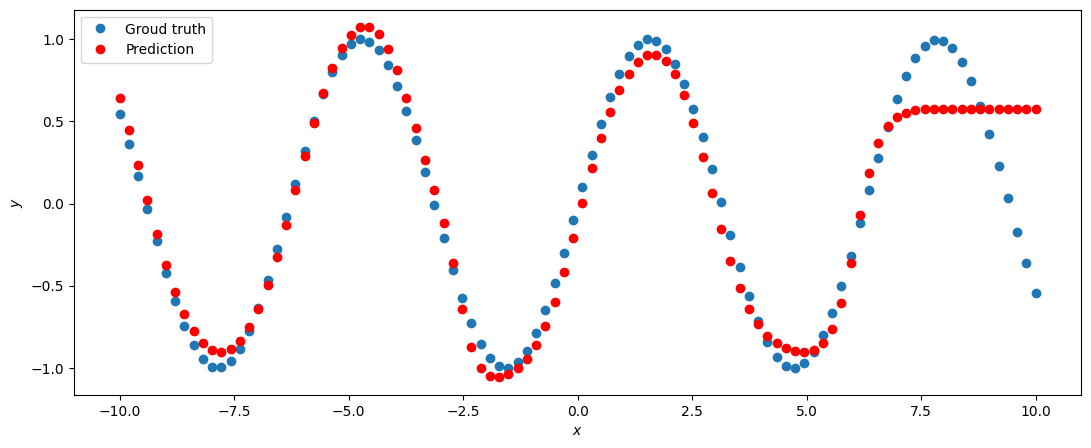

Neurons: 10
Epoch 50, Loss 0.032766193151474
Epoch 100, Loss 0.03266599401831627
Epoch 150, Loss 0.03266286849975586
Epoch 200, Loss 0.03265952691435814
Epoch 250, Loss 0.032655663788318634
Epoch 300, Loss 0.03265131637454033
Epoch 350, Loss 0.03264646977186203
Epoch 400, Loss 0.03264114260673523
Epoch 450, Loss 0.032635342329740524
Epoch 500, Loss 0.03262901306152344


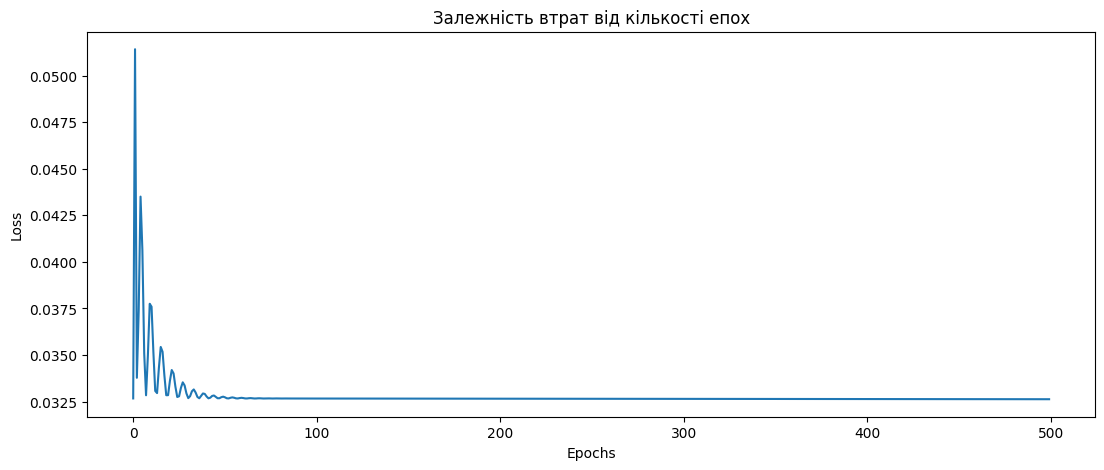

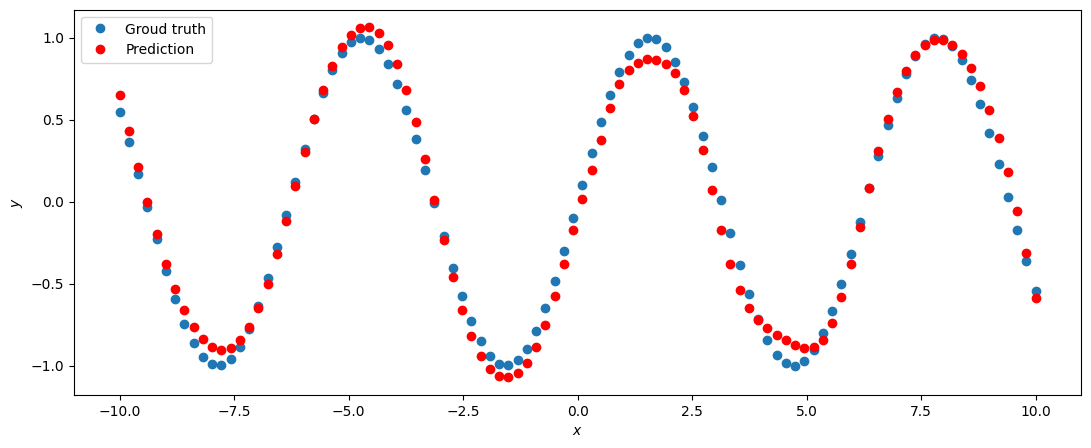

In [116]:
for net in nets_tanh_1_hidden[-4:]:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 500)
    plt.show()

Змінимо функцію активації на ReLU

SineNet(
  (fc1): Linear(in_features=1, out_features=7, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=7, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
...
SineNet(
  (fc1): Linear(in_features=1, out_features=9, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=9, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


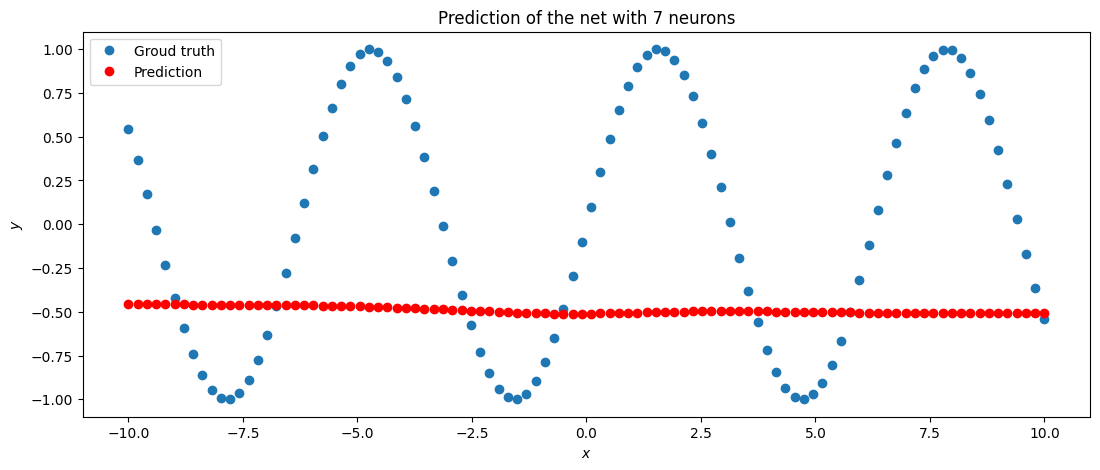

In [117]:
nets_relu_1_hidden = [SineNet(n_neurons, activate=torch.nn.Sigmoid()) for n_neurons in range(7, 11)]
print(*nets_relu_1_hidden[:2], sep='\n\n')
print('...')
print(*nets_relu_1_hidden[-2:], sep='\n\n')

predict(nets_relu_1_hidden[0], x_validation, y_validation)
plt.title(f'Prediction of the net with {nets_relu_1_hidden[0].fc1.out_features} neurons')
plt.show()

Навчаємо

Бачимо гірші результати, не вистачає нейронів

Neurons: 7
Epoch 100, Loss 0.25138816237449646
Epoch 200, Loss 0.19240833818912506
Epoch 300, Loss 0.15399746596813202
Epoch 400, Loss 0.13951216638088226
Epoch 500, Loss 0.1328042447566986
Epoch 600, Loss 0.1287529468536377
Epoch 700, Loss 0.12603849172592163
Epoch 800, Loss 0.12405814230442047
Epoch 900, Loss 0.12245829403400421
Epoch 1000, Loss 0.1210470199584961


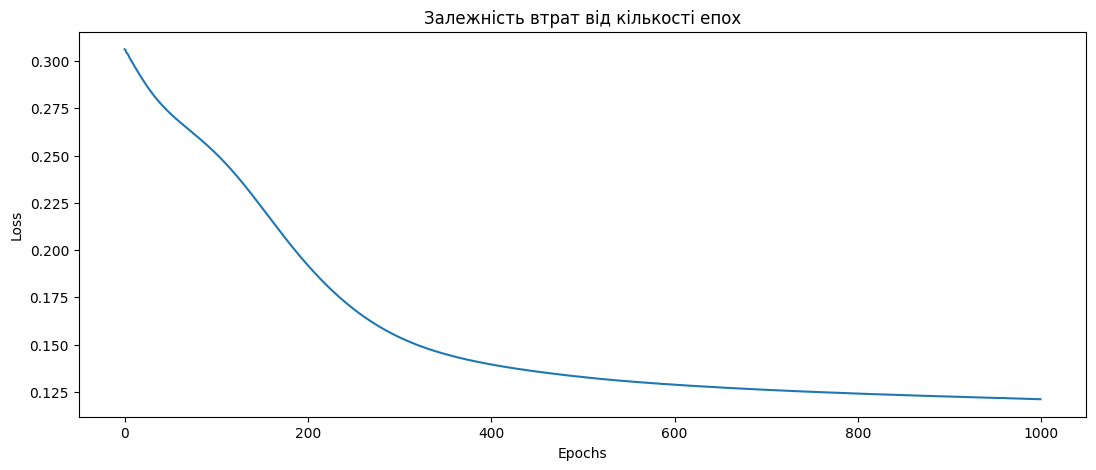

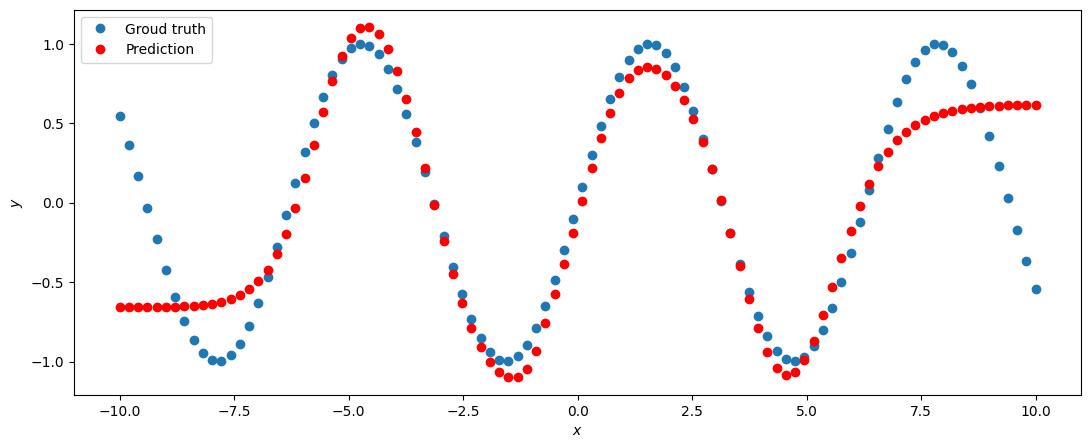

Neurons: 8
Epoch 100, Loss 0.17704500257968903
Epoch 200, Loss 0.1513911634683609
Epoch 300, Loss 0.13965052366256714
Epoch 400, Loss 0.13334640860557556
Epoch 500, Loss 0.12906552851200104
Epoch 600, Loss 0.12194718420505524
Epoch 700, Loss 0.09207247942686081
Epoch 800, Loss 0.08973608911037445
Epoch 900, Loss 0.088393934071064
Epoch 1000, Loss 0.08736076951026917


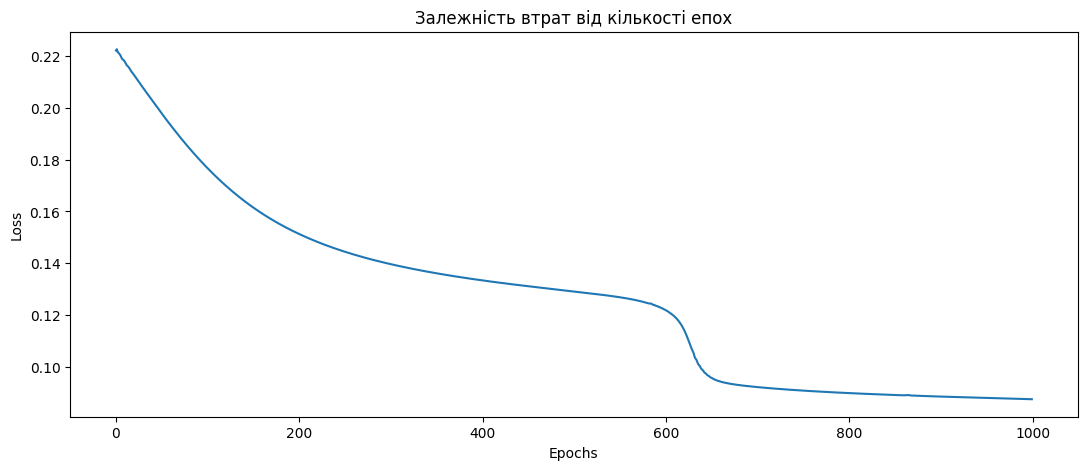

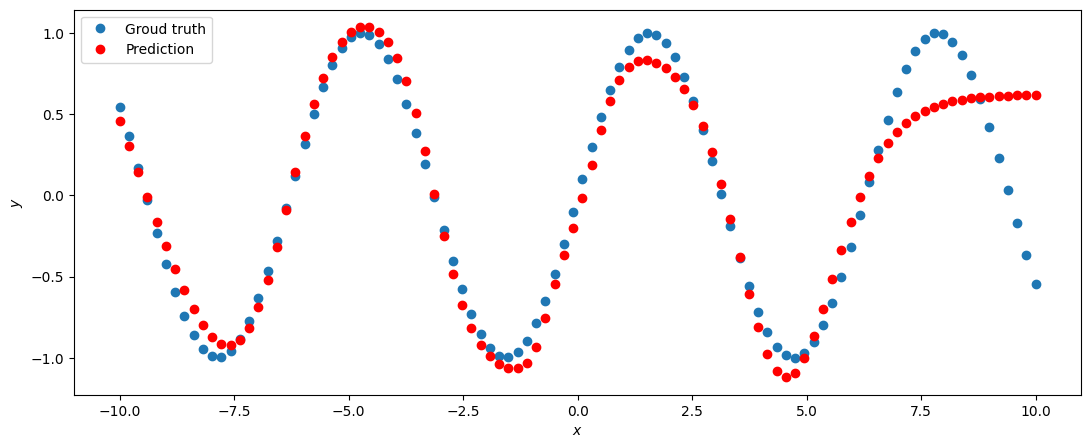

Neurons: 9
Epoch 100, Loss 0.13017800450325012
Epoch 200, Loss 0.12632492184638977
Epoch 300, Loss 0.12398520112037659
Epoch 400, Loss 0.1218758076429367
Epoch 500, Loss 0.11963476240634918
Epoch 600, Loss 0.10664210468530655
Epoch 700, Loss 0.07517489790916443
Epoch 800, Loss 0.06710190325975418
Epoch 900, Loss 0.059924863278865814
Epoch 1000, Loss 0.054669756442308426


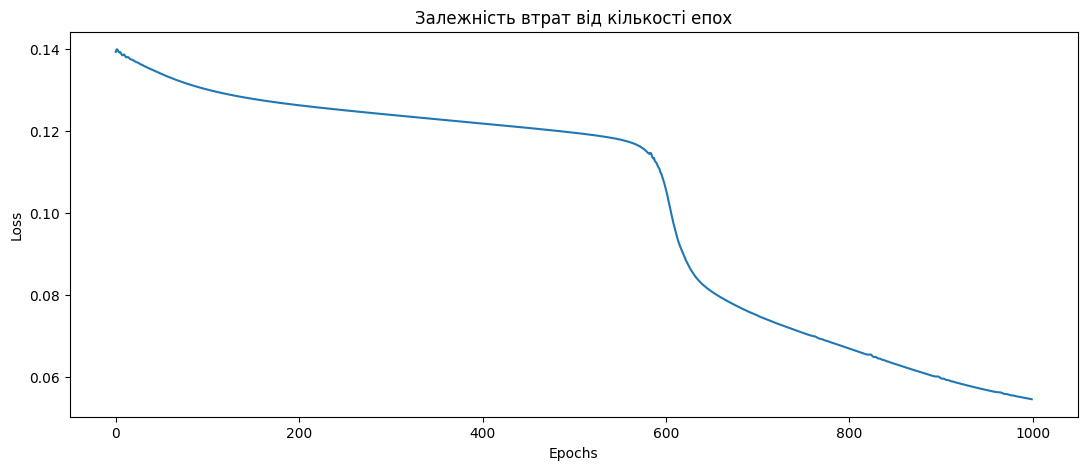

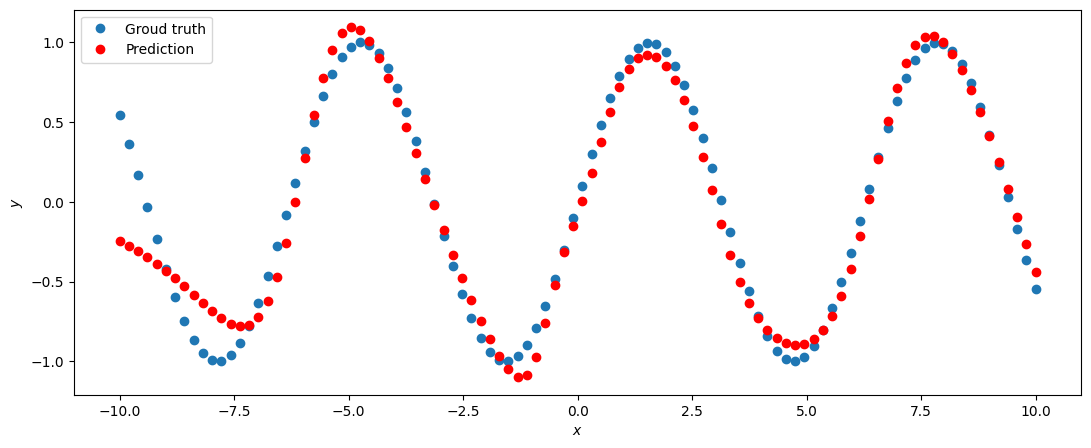

Neurons: 10
Epoch 100, Loss 0.27157697081565857
Epoch 200, Loss 0.2552303373813629
Epoch 300, Loss 0.22182630002498627
Epoch 400, Loss 0.2018875628709793
Epoch 500, Loss 0.19488921761512756
Epoch 600, Loss 0.1683645397424698
Epoch 700, Loss 0.10572431236505508
Epoch 800, Loss 0.09334169328212738
Epoch 900, Loss 0.0896025076508522
Epoch 1000, Loss 0.08772936463356018


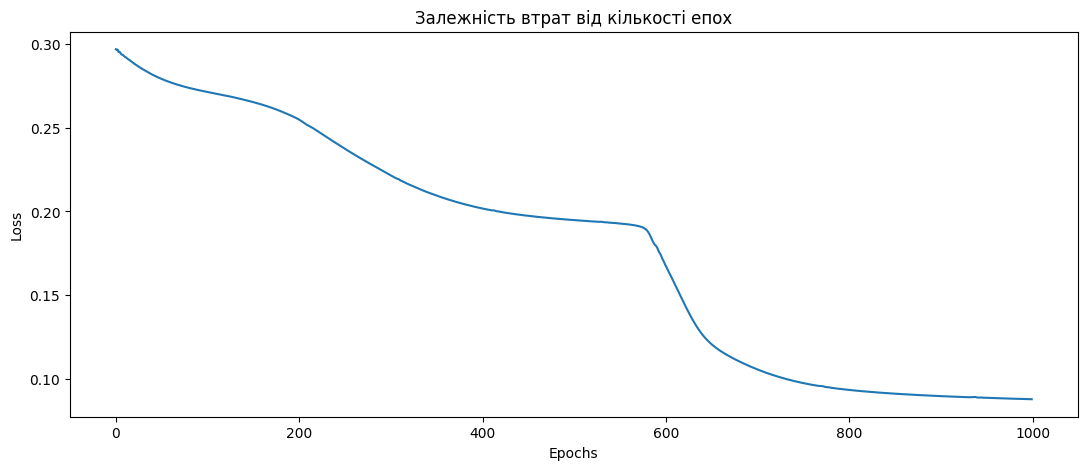

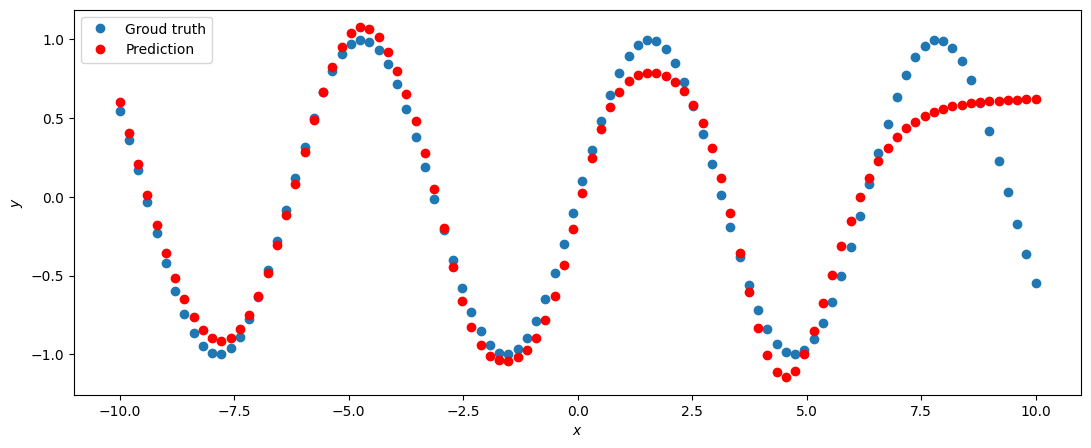

In [121]:
for net in nets_relu_1_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 1000)
    plt.show()

Додамо шари (1 -> 8 -> 16 -> 8 -> 1) з функцією активації tanh

SineNet(
  (fc1): Linear(in_features=1, out_features=7, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=7, out_features=14, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=14, out_features=7, bias=True)
  (act3): Tanh()
  (fc4): Linear(in_features=7, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (act3): Tanh()
  (fc4): Linear(in_features=8, out_features=1, bias=True)
)


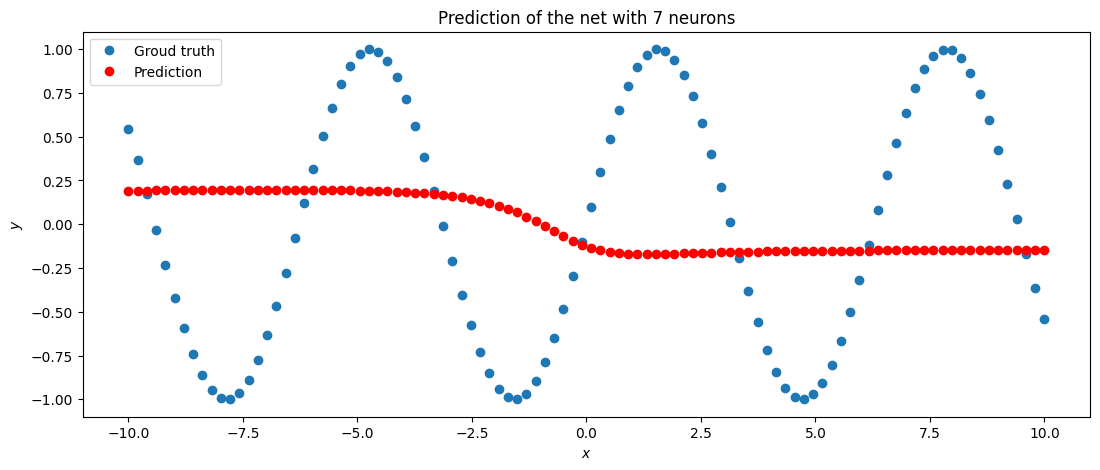

In [122]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, activate=torch.nn.Tanh()):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        # Функція активації
        self.act1 = activate
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons * 2)
        self.act2 = activate
        self.fc3 = torch.nn.Linear(n_hidden_neurons * 2, n_hidden_neurons)
        self.act3 = activate
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

nets_tanh_2_hidden = [SineNet(n_neurons) for n_neurons in range(7, 11)]
print(*nets_tanh_2_hidden[:2], sep='\n\n')

predict(nets_tanh_2_hidden[0], x_validation, y_validation)
plt.title(f'Prediction of the net with {nets_tanh_2_hidden[0].fc1.out_features} neurons')
plt.show()

Тепер навчаємо. Можемо побачити, що результат став значно кращим для кожного варіанту

Neurons: 7
Epoch 100, Loss 0.25583335757255554
Epoch 200, Loss 0.18670353293418884
Epoch 300, Loss 0.1425650268793106
Epoch 400, Loss 0.04464111849665642
Epoch 500, Loss 0.035934384912252426
Epoch 600, Loss 0.03421308100223541
Epoch 700, Loss 0.03476666286587715
Epoch 800, Loss 0.033141497522592545
Epoch 900, Loss 0.032887957990169525
Epoch 1000, Loss 0.040352962911129


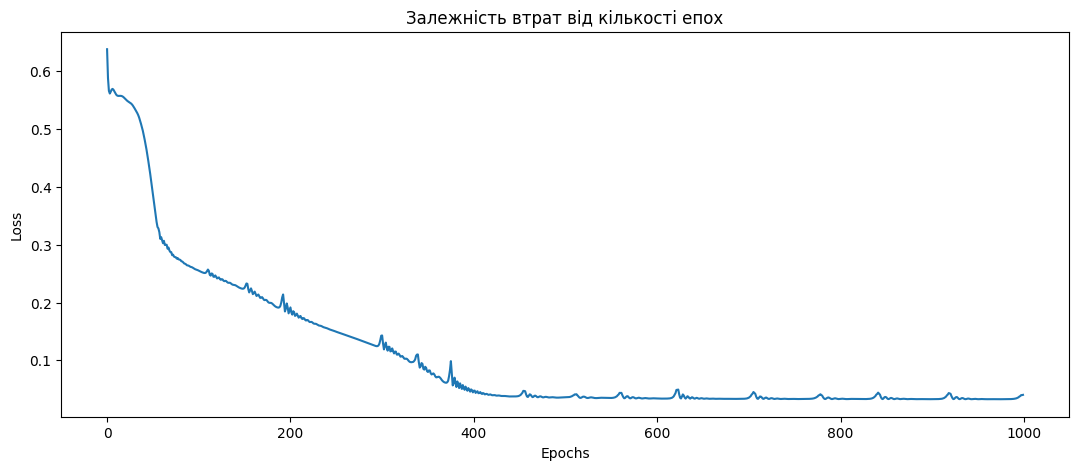

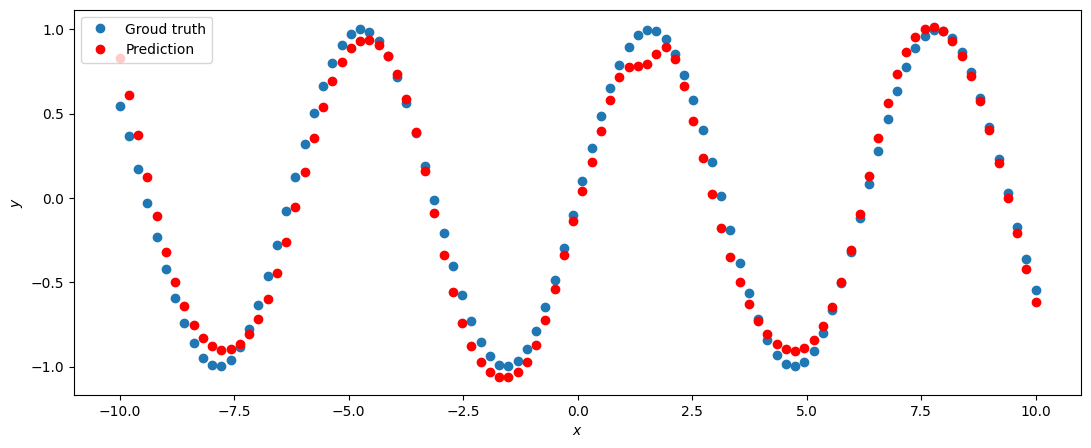

Neurons: 8
Epoch 100, Loss 0.1869719922542572
Epoch 200, Loss 0.1653771847486496
Epoch 300, Loss 0.15133501589298248
Epoch 400, Loss 0.1455317735671997
Epoch 500, Loss 0.10792272537946701


Epoch 600, Loss 0.10273534059524536
Epoch 700, Loss 0.07620031386613846
Epoch 800, Loss 0.08682867139577866
Epoch 900, Loss 0.06128928065299988
Epoch 1000, Loss 0.2749510705471039


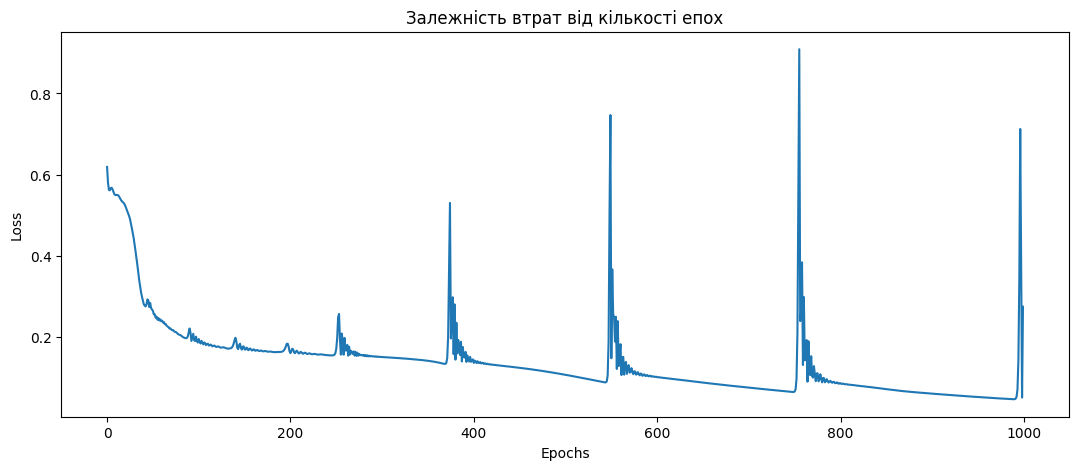

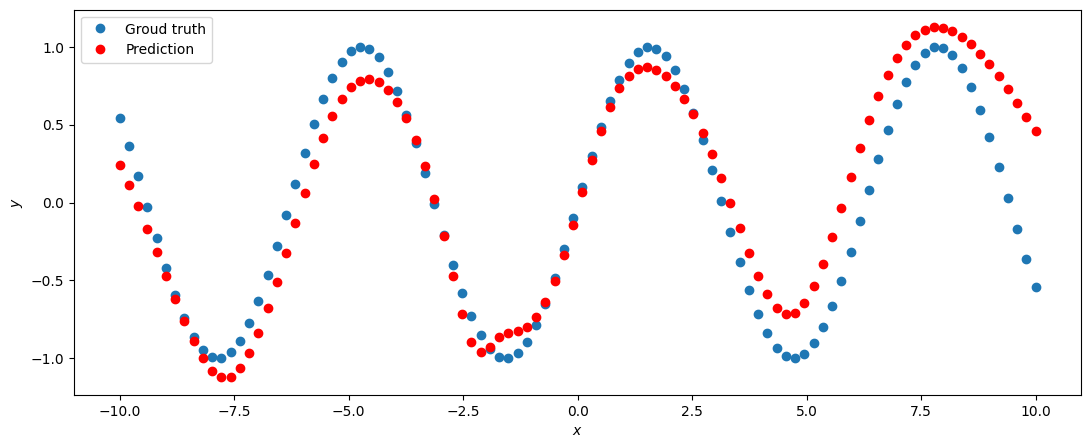

Neurons: 9
Epoch 100, Loss 0.20303276181221008
Epoch 200, Loss 0.15805314481258392
Epoch 300, Loss 0.13194741308689117
Epoch 400, Loss 0.11412320286035538
Epoch 500, Loss 0.06496354192495346
Epoch 600, Loss 0.03472357615828514
Epoch 700, Loss 0.033429693430662155
Epoch 800, Loss 0.03302374482154846
Epoch 900, Loss 0.03269386664032936
Epoch 1000, Loss 0.032388366758823395


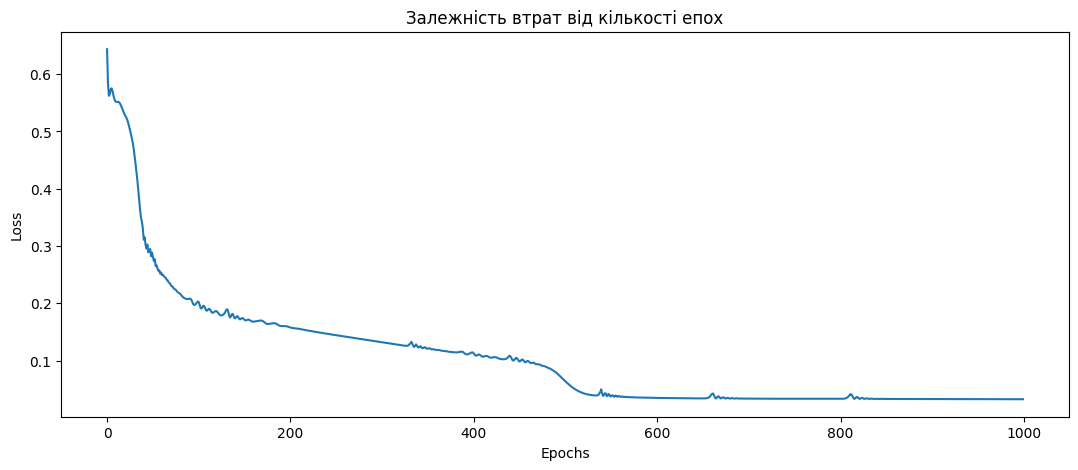

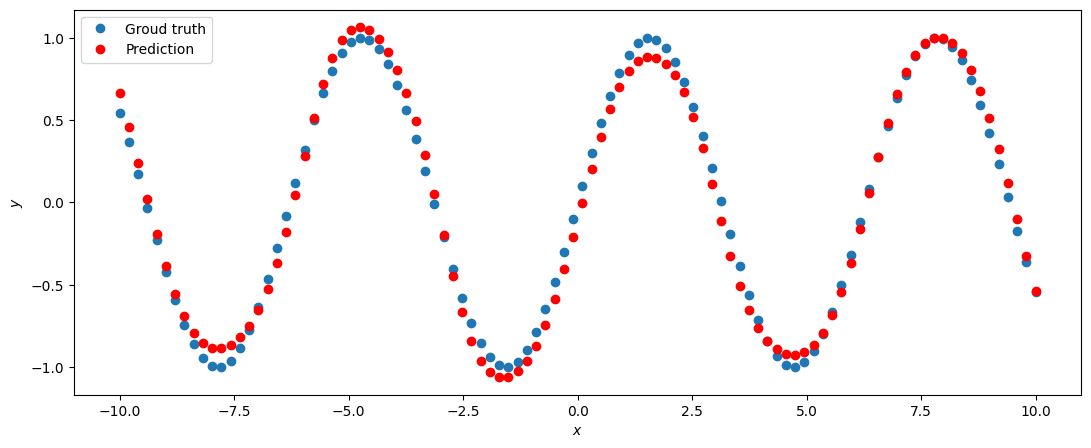

Neurons: 10
Epoch 100, Loss 0.19537362456321716
Epoch 200, Loss 0.1535317301750183
Epoch 300, Loss 0.047777533531188965
Epoch 400, Loss 0.03393124043941498
Epoch 500, Loss 0.033324144780635834
Epoch 600, Loss 0.033160995692014694
Epoch 700, Loss 0.033002421259880066
Epoch 800, Loss 0.03615410253405571
Epoch 900, Loss 0.032776884734630585
Epoch 1000, Loss 0.032666780054569244


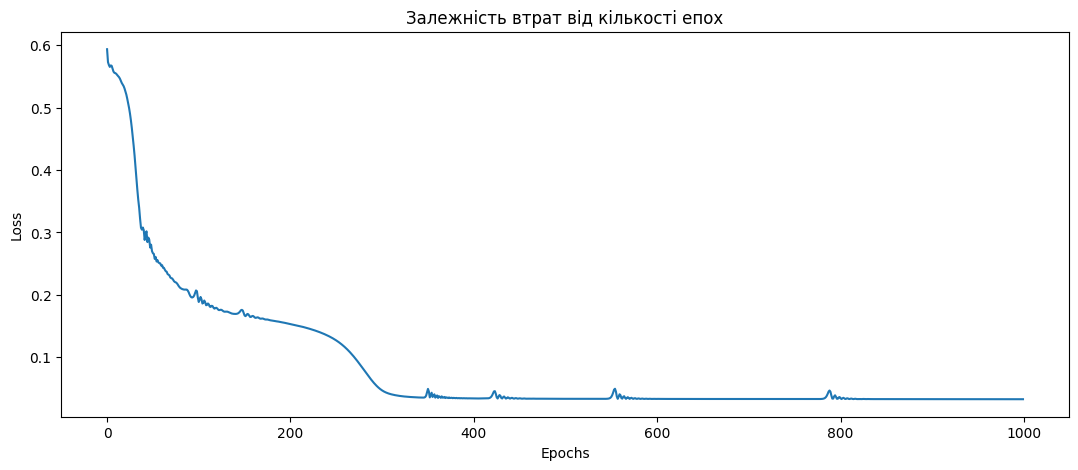

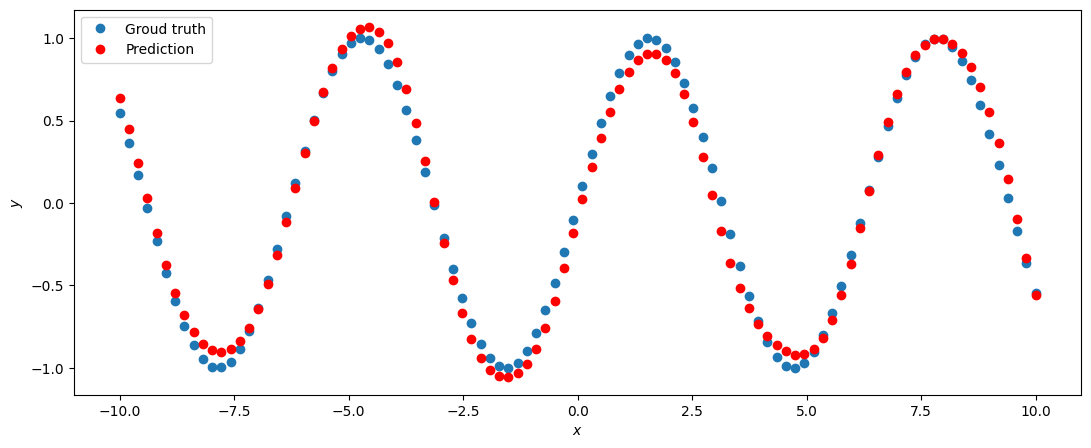

In [123]:
for net in nets_tanh_2_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 1000)
    plt.show()

## Завдання 2


In [133]:
! pip install openpyxl scikit-learn seaborn --quiet

1) Завантаження даних та аналіз кореляції

Беремо значення X1-X5

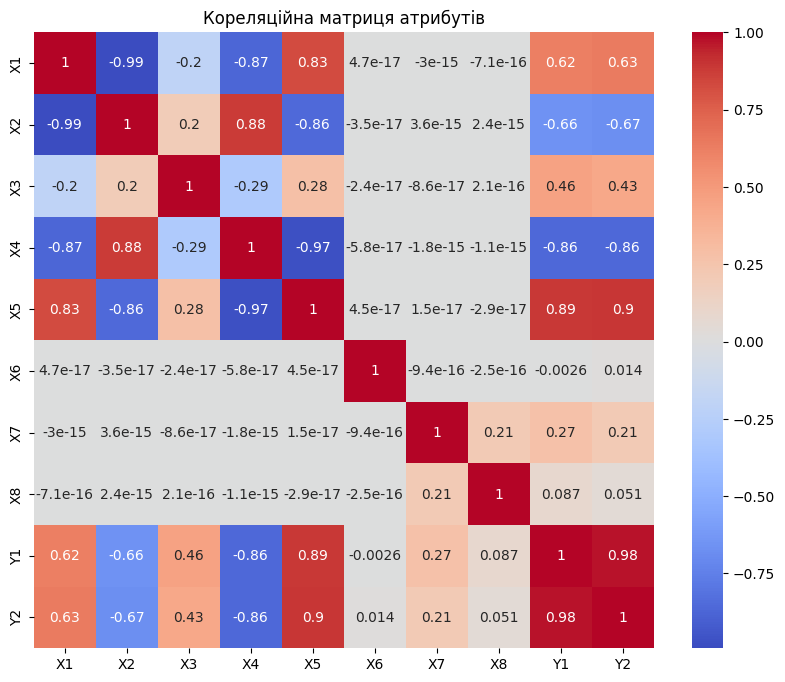

In [134]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
data = pd.read_excel(url)

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.title("Кореляційна матриця атрибутів")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [135]:
# Вибираємо атрибути з найбільшою кореляцією з y1
selected_features = ['X1', 'X2', 'X3', 'X4', 'X5']  # Залишаємо тільки ті ознаки, які мають сильну кореляцію
X = data[selected_features]
y1 = data.iloc[:, 8]  # Навантаження при обігріві
y2 = data.iloc[:, 9]  # Навантаження при охолодженні

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_val, y1_train, y1_val = train_test_split(X_train, y1_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y1_train_tensor = torch.tensor(y1_train.values, dtype=torch.float32).unsqueeze(1)
y1_val_tensor = torch.tensor(y1_val.values, dtype=torch.float32).unsqueeze(1)
y1_test_tensor = torch.tensor(y1_test.values, dtype=torch.float32).unsqueeze(1)


2) Створення нейронної мережі

In [136]:
class EnergyEfficiencyNet(nn.Module):
    def __init__(self):
        super(EnergyEfficiencyNet, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 64)  # Використовуємо кількість вибраних ознак
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = EnergyEfficiencyNet()

3) Навчання моделі

In [141]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

epochs = 400
train_losses = []
val_losses = []

for epoch in range(epochs):
    net.train()
    optimizer.zero_grad()
    y_pred = net(X_train_tensor)
    loss = loss_function(y_pred, y1_train_tensor)
    loss.backward()
    optimizer.step()

    net.eval()
    with torch.no_grad():
        val_pred = net(X_val_tensor)
        val_loss = loss_function(val_pred, y1_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 50/400, Training Loss: 12.348001480102539, Validation Loss: 11.345296859741211
Epoch 100/400, Training Loss: 12.014827728271484, Validation Loss: 10.974286079406738
Epoch 150/400, Training Loss: 11.594910621643066, Validation Loss: 10.547951698303223
Epoch 200/400, Training Loss: 11.11145305633545, Validation Loss: 10.054702758789062
Epoch 250/400, Training Loss: 10.589120864868164, Validation Loss: 9.540130615234375
Epoch 300/400, Training Loss: 9.978583335876465, Validation Loss: 8.937880516052246
Epoch 350/400, Training Loss: 9.730195999145508, Validation Loss: 8.767705917358398
Epoch 400/400, Training Loss: 9.649835586547852, Validation Loss: 8.777524948120117


4) Оцінка та візуалізація результатів

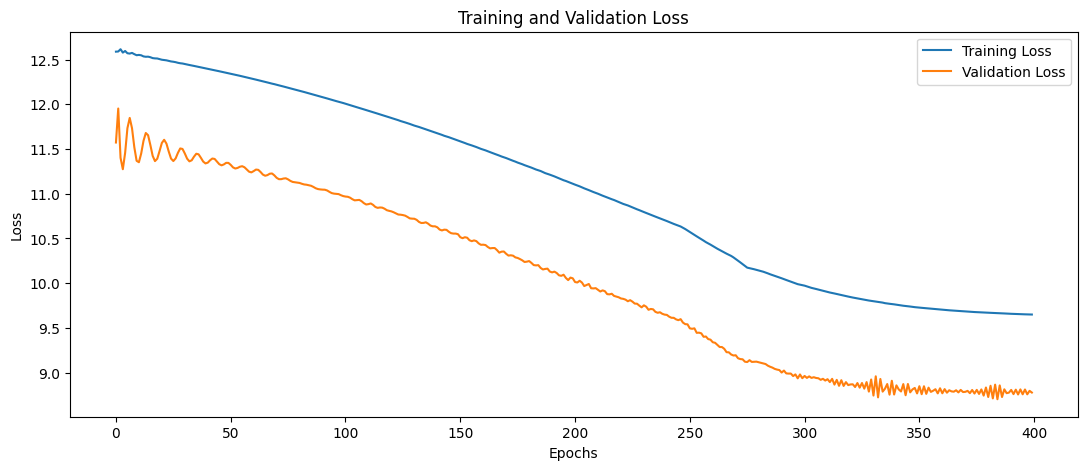

Test Loss: 9.391655921936035


In [142]:
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

net.eval()
with torch.no_grad():
    test_pred = net(X_test_tensor)
    test_loss = loss_function(test_pred, y1_test_tensor)

print(f'Test Loss: {test_loss.item()}')

## Завдання 3

1) Завантаження та підготовка даних

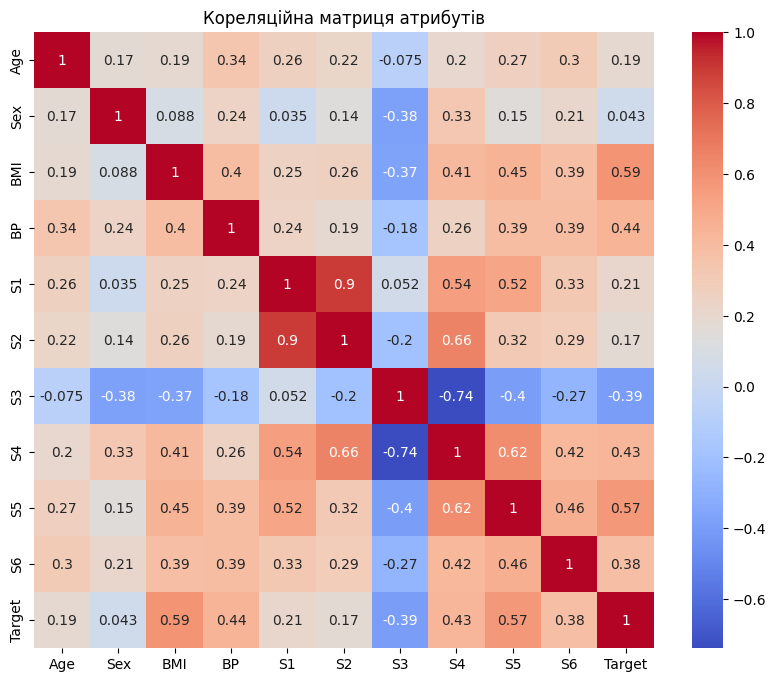

In [153]:
from sklearn import datasets
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних про діабет
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Перетворення у DataFrame для аналізу кореляції
columns = ['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
data = pd.DataFrame(diabetes_X, columns=columns)
data['Target'] = diabetes_y

# Аналіз кореляції
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.title("Кореляційна матриця атрибутів")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [154]:
# Вибираємо атрибути з найбільшою кореляцією з цільовою змінною
selected_features = ['BMI', 'BP', 'S3', 'S4', 'S5', 'S6']
X = data[selected_features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

2) Створення нейронної мережі

In [155]:
class DiabetesNet(nn.Module):
    def __init__(self):
        super(DiabetesNet, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 64)  # Використовуємо вибрані ознаки
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = DiabetesNet()

3) Навчання моделі

In [156]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

epochs = 500
train_losses = []
val_losses = []

for epoch in range(epochs):
    net.train()
    optimizer.zero_grad()
    y_pred = net(X_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    net.eval()
    with torch.no_grad():
        val_pred = net(X_val_tensor)
        val_loss = loss_function(val_pred, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 50/500, Training Loss: 27040.478515625, Validation Loss: 30896.306640625
Epoch 100/500, Training Loss: 20550.59765625, Validation Loss: 23378.158203125
Epoch 150/500, Training Loss: 9360.642578125, Validation Loss: 10670.3056640625
Epoch 200/500, Training Loss: 5224.90869140625, Validation Loss: 5732.15087890625
Epoch 250/500, Training Loss: 4517.2177734375, Validation Loss: 4813.12646484375
Epoch 300/500, Training Loss: 4009.647216796875, Validation Loss: 4169.27685546875
Epoch 350/500, Training Loss: 3675.904541015625, Validation Loss: 3732.095947265625
Epoch 400/500, Training Loss: 3469.059814453125, Validation Loss: 3439.23388671875
Epoch 450/500, Training Loss: 3335.989990234375, Validation Loss: 3250.612060546875
Epoch 500/500, Training Loss: 3244.802490234375, Validation Loss: 3121.633056640625


4) Оцінка та візуалізація результатів

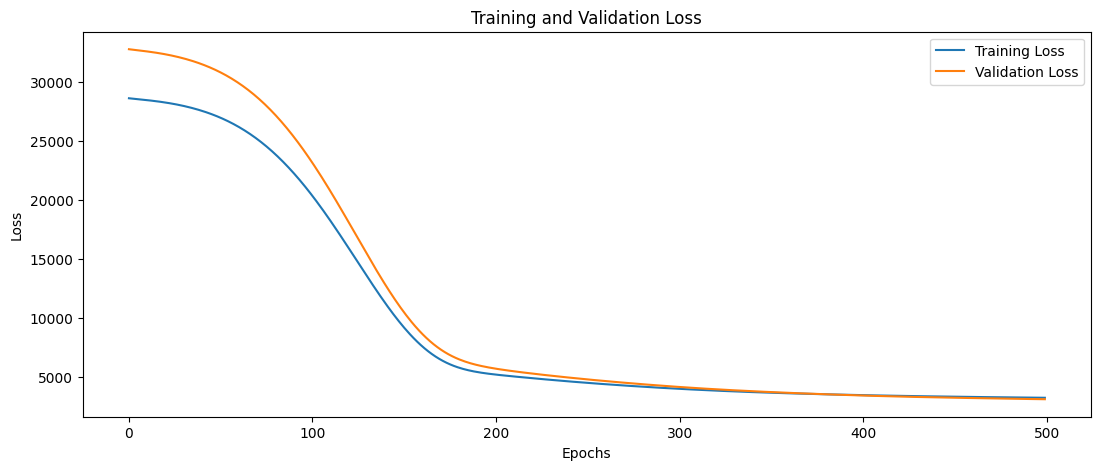

Test Loss: 3083.939208984375


In [157]:
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

net.eval()
with torch.no_grad():
    test_pred = net(X_test_tensor)
    test_loss = loss_function(test_pred, y_test_tensor)

print(f'Test Loss: {test_loss.item()}')